# PATIENT FALL RISK ASSESSMENT PROJECT

## Background


The clinic's director seeks to improve patient safety and reduce fall-related incidents. Falls among patients pose a significant risk, leading to severe health complications and increased healthcare costs. To address this issue, a data-driven assessment is required to better understand the factors contributing to falls and to develop predictive measures for mitigating them effectively.

The dataset used for this analysis consists of patient-related information, categorized into two types:

 - Medical Data: Collected upon patient admission and during patient stay, this dataset includes age, gender, diagnosis, and procedure. This data is always available for every patient.

 - Nursing Data: The remaining variables in this dataset come from the so-called fall risk assessment. This assessment is conducted by nurses and contains various risk factors that are assumed to contribute to patient falls. Unlike medical data, nursing data is manually recorded and is only collected for specific patients—namely, those deemed at an increased risk of falling or those who exceed a certain age threshold. From these variables also the variable fall risk is derived, that is the traditional nursing assessment of a patient’s fall risk.

Our task is to conduct a predictive analytics project with two main objectives:

1) Develop a reliable assessment of the risk of patient falls based on historical data.

2) Identify key factors that contribute to fall incidents.

## Section 1: Data Overview and Preparation

In this section, we:
 - Provide a clear and intuitive summary of the dataset.

 - Define an approach to identify outliers and implement an appropriate method to handle them.

 - Identify and assess missing data. Define an approach to handle the missing data.

 - Establish an appropriate strategy for partitioning training and testing datasets


### Import Necessary Libraries

In [99]:
import pandas as pd
# %pip install autoviz
#from autoviz.AutoViz_Class import AutoViz_Class
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np
import scipy.stats as stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, recall_score
from sklearn.metrics import (
     accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve
 )
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
     precision_recall_curve, roc_auc_score, confusion_matrix, classification_report, auc
 )

import xgboost as xgb
import shap
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import shap
import prince
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
from catboost import CatBoostClassifier, Pool

In [100]:
pd.set_option('display.max_rows', 200)

### 1.1 SUMMARY OF THE DATASET

In [101]:
pwd()

'c:\\Users\\felix\\OneDrive\\Dokumente\\FU_Working\\ApplAna\\FallPredictionUV\\repos\\Applied-Analytics-Portfolio'

In [102]:
# Load the dataset
path = "data/kip_sdm_syn.csv"
df = pd.read_csv(path, sep=",")

# Display the first few rows to understand the structure
df.head()

,fallen,id,age,procedure,diagnosis,c_zriserh1,decubitus-admission,decubitus-at_the_moment,bed_mobility-impairment,bed_mobility-jones,...,cognition-disoriented_time,cognition-disoriented_location,cognition-disoriented_own_person,cognition-agitated,cognition-confused,psychotropic_or_sedatives_drugs,decubitus-risk,fall-risk,diseases,sex
0,False,179020,39,0,S250,False,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,NaN,NaN,False,female
1,False,112009,29,0,M418,False,False,NaN,NaN,NaN,...,False,False,False,False,False,False,NaN,NaN,NaN,male
2,False,54403,29,9-26,S910,False,NaN,False,NaN,NaN,...,False,False,False,False,False,NaN,NaN,0,NaN,female
3,False,13054,64,8-77,M400,True,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,0,0,False,male
4,False,45770,89,8-93,K630,False,NaN,False,NaN,NaN,...,False,False,False,False,False,False,NaN,NaN,NaN,male


#### Shape and Data Types

In [103]:
print("Number of rows and columns:", df.shape)
print("\nData Types:\n", df.dtypes.value_counts())
print("\nColumn Names:\n", df.columns.tolist())

Number of rows and columns: (40000, 45)

Data Types:
 object     23
bool       19
int64       2
float64     1
Name: count, dtype: int64

Column Names:
 ['fallen', 'id', 'age', 'procedure', 'diagnosis', 'c_zriserh1', 'decubitus-admission', 'decubitus-at_the_moment', 'bed_mobility-impairment', 'bed_mobility-jones', 'bed_mobility-skin_condition', 'transfer-impairment', 'transfer', 'medical_items', 'medical_items-arm_or_leg_splint', 'medical_items-A_V_system', 'medical_items-plaster_or_neck_brace', 'medical_items-compression_stocking', 'medical_items-ventilation_mask', 'medical_items-O2_glasses', 'medical_items-orthesis', 'medical_items-prosthesis', 'medical_items-skin_condition_at_item_application', 'fall-last_12_month', 'fall-how_many_last_12_month', 'fall-while_stay', 'fall-while_transfer', 'walk-impairment', 'walk-jones', 'walk-balance_and_gait_impaired', 'walking_aid', 'excretions-impairment', 'excretions-incontinence', 'excretions-nykturie', 'cognition-impairment', 'cognition-disorie

In [70]:
# Overview of all variable names and their data types
print("\nVariable names and their data types:")
print(df.dtypes)  # Displays column names with their data types


Variable names and their data types:
fallen                                                 bool
id                                                    int64
age                                                   int64
procedure                                            object
diagnosis                                            object
c_zriserh1                                             bool
decubitus-admission                                  object
decubitus-at_the_moment                              object
bed_mobility-impairment                              object
bed_mobility-jones                                   object
bed_mobility-skin_condition                          object
transfer-impairment                                  object
transfer                                             object
medical_items                                        object
medical_items-arm_or_leg_splint                        bool
medical_items-A_V_system                               bool
me

In [71]:
# Counts the unique values in each column of the DataFrame `df`.

# This step helps in understanding the variability and distribution of data within each column.
# It is particularly useful for identifying categorical variables, columns with low variance,
# and potential issues such as columns with a single unique value or unexpected data types.

unique_counts = df.nunique()
print(unique_counts)

fallen                                                  2
id                                                  38226
age                                                    84
procedure                                             209
diagnosis                                            3345
c_zriserh1                                              2
decubitus-admission                                     1
decubitus-at_the_moment                                 2
bed_mobility-impairment                                 2
bed_mobility-jones                                      5
bed_mobility-skin_condition                             2
transfer-impairment                                     2
transfer                                                5
medical_items                                           2
medical_items-arm_or_leg_splint                         2
medical_items-A_V_system                                1
medical_items-plaster_or_neck_brace                     2
medical_items-

##### Observations: Columns with Low Variance
- Some columns, such as `medical_items-A_V_system` and `decubitus-admission`, lack variance and hold no predictive power. These columns are dropped in subsequent steps.
- The variable `c_zriserh1` is undocumented and is also removed from the dataset.

In [72]:
df["decubitus-admission"].value_counts()

decubitus-admission
False    9399
Name: count, dtype: int64

In [73]:
df["medical_items-A_V_system"].value_counts()

medical_items-A_V_system
False    40000
Name: count, dtype: int64

##### Actions Taken
- Dropped columns with no predictive power: `medical_items-A_V_system`, `decubitus-admission`, and `c_zriserh1`.
- Inspected the distribution of unique values and data types to guide preprocessing and feature engineering.

In [104]:
df = df.drop(["medical_items-A_V_system", "decubitus-admission", "c_zriserh1"], axis=1)

#### Distribution of the Target Variable `fallen`

The target variable `fallen` represents whether a patient has experienced a fall (1 = Yes, 0 = No). Understanding the distribution of this variable is crucial for assessing class imbalance, which can significantly impact model performance.

- **Visualization**: A count plot is used to display the distribution of the `fallen` variable. The y-axis is scaled logarithmically to better visualize the counts, especially if there is a significant class imbalance.
- **Annotations**: Each bar in the plot is annotated with its respective count for clarity.

The code below generates the visualization:

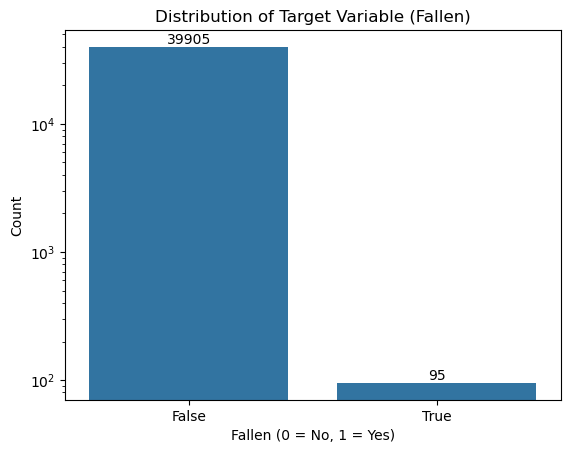

In [105]:
sns.countplot(data=df, x='fallen')
plt.title('Distribution of Target Variable (Fallen)')
plt.xlabel('Fallen (0 = No, 1 = Yes)')
plt.ylabel('Count')

# Annotate the bars with their respective counts
for p in plt.gca().patches:
	count = int(p.get_height())
	plt.annotate(f'{count}', (p.get_x() + p.get_width() / 2., p.get_height()),
				 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
				 textcoords='offset points')

plt.yscale('log')  # Use logarithmic scale for better visualization
plt.show()

In [106]:
print("Value distribution for 'fallen':")
print(df['fallen'].value_counts())
fall_counts = df['fallen'].value_counts(normalize=True) * 100
print("\nPercentage of Fall Incidents:\n", fall_counts.round(2))

Value distribution for 'fallen':
fallen
False    39905
True        95
Name: count, dtype: int64

Percentage of Fall Incidents:
 fallen
False    99.76
True      0.24
Name: proportion, dtype: float64


**Key Observations**:
- The distribution of the `fallen` variable is imbalanced, with significantly more instances of patients who did not fall compared to those who did.
- This imbalance will need to be addressed during model training, possibly through techniques such as oversampling, undersampling, or using class-weighted algorithms.

#### Check Missing Values

In this section, we analyze the missing data in the dataset to understand its extent and distribution. This step is crucial for determining the appropriate imputation strategies and handling missing values effectively.

In [107]:
# Calculate missing values and percentages for all columns
missing = df.isnull().sum()
missing_percentage = (missing / len(df)) * 100

# Create a DataFrame for the summary
missing_summary = pd.DataFrame({
	'Missing Values': missing,
	'Percentage': missing_percentage.round(2)
}).sort_values(by='Percentage', ascending=False)

# Display the summary
print("\nMissing Values per Column:\n", missing_summary)


Missing Values per Column:
                                                   Missing Values  Percentage
medical_items-skin_condition_at_item_application           38637       96.59
fall-how_many_last_12_month                                38600       96.50
bed_mobility-skin_condition                                38447       96.12
bed_mobility-jones                                         37593       93.98
fall-while_stay                                            37212       93.03
transfer                                                   36994       92.48
walk-jones                                                 35627       89.07
decubitus-at_the_moment                                    30401       76.00
psychotropic_or_sedatives_drugs                            30203       75.51
cognition-impairment                                       29957       74.89
diseases                                                   29956       74.89
excretions-impairment                          

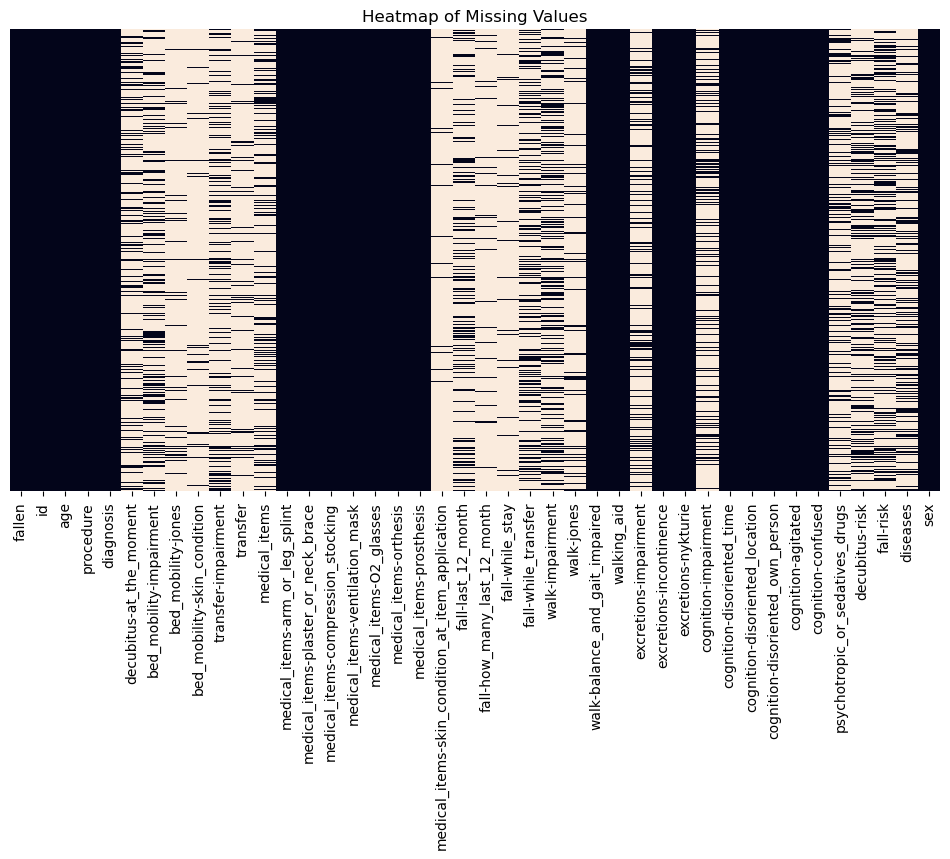

In [108]:
# Visualizing missing data
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.show()

##### Observations: Missingness
- The heatmap of missing values reveals that certain columns have a significant proportion of missing data, with some exceeding 90%.  
- The absence of clear patterns in the missing data suggests that the missingness is likely not completely random (MNAR), and domain knowledge might be necessary to determine the best imputation strategy.  
- Logical columns with high missingness might represent "not assessed" or "unknown" states, which could be encoded as separate categories.

### 1.2 HANDLING MISSING DATA

From the provided explanations, we have the following columns to consider:
  - Columns with 0 missing values (fully recorded) an require no imputation.
  - Logical columns with high missingness => means "not assessed" or "unknown".
  - Jones score columns, '`decubitus-risk` and `fall-risk` (character) with values `{0, +, ++}` that hold ordinal values.

#### 1.2.1 Handle Missing Data in Boolean Variables

Upon examination, some features are recognized automatically as `object`.
We did further inspection to determine if the data types are properly assigned.
We determined the features that should be encoded as `bool` and convert them accoringly.

In [109]:
bool_vars = [
    "decubitus-at_the_moment",
    "bed_mobility-impairment",
    "bed_mobility-skin_condition",
    "transfer-impairment",
    "medical_items",
    "medical_items-skin_condition_at_item_application",
    "fall-last_12_month",
    "fall-while_stay",
    "fall-while_transfer",
    "walk-impairment",
    "excretions-impairment",
    "cognition-impairment",
    "psychotropic_or_sedatives_drugs",
    "diseases"
]

df[bool_vars] = df[bool_vars].astype("boolean")

In [110]:
# List of boolean/categorical columns that need NaN imputation and dummy encoding
columns_to_encode = [
    "fall-while_stay", "transfer-impairment", "bed_mobility-impairment",
    "excretions-impairment", "cognition-impairment", "walk-impairment",
    "fall-while_transfer", "fall-last_12_month", "medical_items-skin_condition_at_item_application",
    "medical_items", "bed_mobility-skin_condition", "decubitus-at_the_moment", "psychotropic_or_sedatives_drugs", "diseases", "sex"
]

# Fill NaNs with "Unknown" and convert to categorical type
df[columns_to_encode] = df[columns_to_encode].astype("object").fillna("Unknown")

# Apply one-hot encoding
df = pd.get_dummies(df, columns=columns_to_encode, dtype=int)



One-hot encoding is used for the following reasons:
1. **Machine Learning Compatibility**: Many machine learning algorithms require numerical input. One-hot encoding converts categorical variables into a numerical format that can be used directly by these algorithms.

2. **Avoiding Ordinal Assumptions**: Unlike label encoding, one-hot encoding does not impose any ordinal relationship between categories. This is particularly important for non-ordinal categorical variables, where the order of categories does not have any inherent meaning.

3. **Handling Missing Data**: By filling missing values with "Unknown" and applying one-hot encoding, we ensure that missing data is treated as a separate category. This allows the model to learn patterns associated with missingness, which can sometimes be predictive.

4. **Interpretability**: One-hot encoded variables are easier to interpret in terms of their individual contributions to the model, as each category is represented as a separate binary feature.

5. **Flexibility**: One-hot encoding works well with a wide range of machine learning models, including tree-based models and linear models, making it a versatile choice for preprocessing categorical data.

#### 1.2.2 Handle Missing Data in Numerical Variables

The only numerical variable with missing data is `fall-how_many_last_12_month`. In out final approach, we just left the variable unimputed because it yielded the best result. We show the other imputation strategies we employed:

- **imputation with missingness indicator**

- **imputation with hot-deck encoding** 


##### Imputation with Missingness Indicator

In [111]:
# Create a missing indicator for "fall-how_many_last_12_month"
df["fall-how_many_last_12_month_missing"] = df["fall-how_many_last_12_month"].isna()

##### Imputation with Hot Deck Encoding

Lets look at the distribution of the variable to check if hot-deck imputation makes sense.

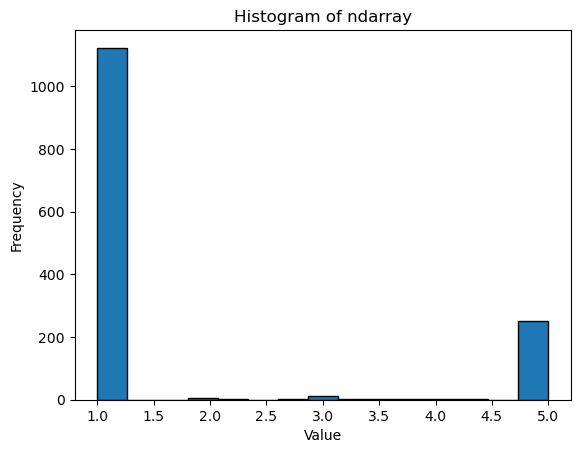

In [82]:
df_temp = df.copy()
plt.hist(df_temp["fall-how_many_last_12_month"], bins=15, edgecolor='black')  # Increase bins for finer granularity
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of ndarray")
plt.show()

In [83]:
# Step 1: Copy the column to a new column
df_temp['fall_scrambled'] = df_temp['fall-how_many_last_12_month'].copy()

# Step 2: Remove missing values and randomly shuffle the column
non_missing_values = df_temp['fall_scrambled'].dropna().sample(frac=1, random_state=42).values  # Shuffle

# Step 3: Replicate values so that there are as many as needed
num_missing = df_temp['fall-how_many_last_12_month'].isna().sum()
replicated_values = np.tile(non_missing_values, (num_missing // len(non_missing_values) + 1))[:num_missing]

# Step 4: Join the scrambled column with the original DataFrame
df_temp.loc[df_temp['fall-how_many_last_12_month'].isna(), 'fall-how_many_last_12_month'] = replicated_values

# Step 5: Drop the scrambled column (optional)
df_temp.drop(columns=['fall_scrambled'], inplace=True)

# Check if missing values are imputed
print(df_temp['fall-how_many_last_12_month'].isna().sum())  # Should be 0 if all NaNs were filled

0


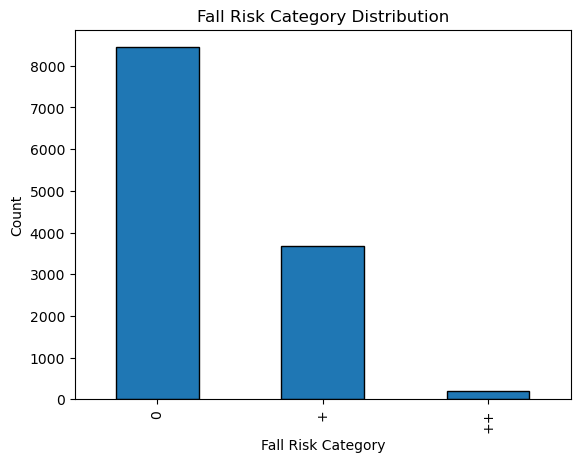

In [84]:
# plt.hist(df_temp["fall-risk"], bins=15, edgecolor='black')  # Increase bins for finer granularity
# plt.xlabel("Value")
# plt.ylabel("Frequency")
# plt.title("Histogram of ndarray")
# plt.show()

df_temp["fall-risk"].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel("Fall Risk Category")
plt.ylabel("Count")
plt.title("Fall Risk Category Distribution")
plt.show()


As demonstrated, the hot-deck imputation successfully filled the missing values.

Both imputation strategies were rigorously evaluated using the pipeline described later in this notebook. However, neither approach resulted in performance improvements. Consequently, the final model is capable of handling missing data. Therefore we move forward without imputing these values. 

In [112]:
df["fall-how_many_last_12_month"] = df["fall-how_many_last_12_month"].fillna(df["fall-how_many_last_12_month"].mean())

#### 1.2.3 Check Ordinal Variables

The variables down below can be imputed with an OrdinalEncoder or with one-hot encoding.

In [86]:
df_temp["transfer"] = OrdinalEncoder().fit_transform(df_temp[["transfer"]])
df_temp["bed_mobility-jones"] = OrdinalEncoder().fit_transform(df_temp[["bed_mobility-jones"]])
df_temp["decubitus-risk"] = OrdinalEncoder().fit_transform(df_temp[["decubitus-risk"]])
df_temp["fall-risk"] = OrdinalEncoder().fit_transform(df_temp[["fall-risk"]])
df_temp["walk-jones"] = OrdinalEncoder().fit_transform(df_temp[["walk-jones"]])

Again both approaches were tested and we decided for the one-hot encoding since this approach yielded better results.

The reason for this is obvious by looking at the following crosstabs:

In [87]:
ct = pd.crosstab(df['fall-risk'], df['fallen'])
print(ct)

fallen     False  True 
fall-risk              
+           3590     95
++           197      0
0           8446      0


In [88]:
ct = pd.crosstab(df['walk-jones'], df['fallen'])
print(ct)

fallen      False  True 
walk-jones              
1             454     31
2            3082      3
3             475     12
4A            233     10
4B             70      3


It is obvious from these crosstabs that the variables `fall-risk` and `walk-jones` are actually not ordinal, i.e. higher jones score/risk profile does not lead to more falls.

##### One-hot Encoding for the Supposedly Ordinal Variables

In [113]:
columns_to_encode = ["transfer", "bed_mobility-jones", "walk-jones", "decubitus-risk", "fall-risk"]

# Fill NaNs with "Unknown"
df[columns_to_encode] = df[columns_to_encode].fillna("Unknown")

# Apply one-hot encoding
df = pd.get_dummies(df, columns=columns_to_encode)

In [114]:
df.head()

,fallen,id,age,procedure,diagnosis,medical_items-arm_or_leg_splint,medical_items-plaster_or_neck_brace,medical_items-compression_stocking,medical_items-ventilation_mask,medical_items-O2_glasses,...,walk-jones_4B,walk-jones_Unknown,decubitus-risk_+,decubitus-risk_++,decubitus-risk_0,decubitus-risk_Unknown,fall-risk_+,fall-risk_++,fall-risk_0,fall-risk_Unknown
0,False,179020,39,0,S250,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
1,False,112009,29,0,M418,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True
2,False,54403,29,9-26,S910,False,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
3,False,13054,64,8-77,M400,False,False,False,False,False,...,False,True,False,False,True,False,False,False,True,False
4,False,45770,89,8-93,K630,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True


#### 1.2.4 Handle Procedure and Diagnosis Columns

**Note on Categorical Columns: ICD-10 and OPS Codes:**

We carefully considered how to handle the `ICD-10` and `OPS` code columns. One-hot encoding these features would result in a dataset with extremely high dimensionality, which is not practical. Even applying dimensionality reduction techniques would likely be ineffective due to the sparsity and complexity of these codes.

Instead, we chose to bin both columns. This approach is appropriate because both `ICD-10` and `OPS` codes are structured hierarchically:

 - The first letter (`ICD-10`) or the first digit (`OPS`) typically represents a broad medical category.

 - The remaining characters provide more specific details, which are often too granular to add meaningful value for modeling.

By focusing on these broader categories, we retain the most informative aspects of the codes while keeping the feature space manageable.

For example `ICD-10` code `6` gives infromation on whether the patient received medication, a very interesting column to look at.

In [115]:
df["procedure_category"] = df["procedure"].apply(lambda x: x if x == "0" else x.split("-")[0])
df_dummies = pd.get_dummies(df["procedure_category"], prefix="procedure_category")
# # Combine with the original DataFrame
df = pd.concat([df, df_dummies], axis=1)

In [116]:
# Extract the first letter (ICD-10 chapter)
df["ICD10_category"] = df["diagnosis"].str[0]
# One-hot encode the categories
df_dummies = pd.get_dummies(df["ICD10_category"], prefix="ICD10")
# Combine with the original DataFrame
df = pd.concat([df, df_dummies], axis=1)

In [117]:
df.head()

,fallen,id,age,procedure,diagnosis,medical_items-arm_or_leg_splint,medical_items-plaster_or_neck_brace,medical_items-compression_stocking,medical_items-ventilation_mask,medical_items-O2_glasses,...,ICD10_Q,ICD10_R,ICD10_S,ICD10_T,ICD10_U,ICD10_V,ICD10_W,ICD10_X,ICD10_Y,ICD10_Z
0,False,179020,39,0,S250,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,False,112009,29,0,M418,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,54403,29,9-26,S910,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,False,13054,64,8-77,M400,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,45770,89,8-93,K630,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Notes**: 
- Ranking the probability of patient's fall (e.g. high risk, etc.) might be enough instead of assigning individual patient's fall/non-fall value.
- Missing nursing data is not MCAR -> Dummy variables for unknown values might be a good predictors.

### 1.3 Outlier detection

In [118]:
numerical_vars = ["age", "fall-how_many_last_12_month"]

In [119]:
def tukey_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (series < lower) | (series > upper)

# Example for all numerical vars:
outlier_flags_tukey = pd.DataFrame()
for col in numerical_vars:
    outlier_flags_tukey[col] = tukey_outliers(df[col])

# Summary
print("Tukey Outliers Count:")
print(outlier_flags_tukey.sum().sort_values(ascending=False))

Tukey Outliers Count:
fall-how_many_last_12_month    1400
age                               0
dtype: int64


In [120]:
df["fall-how_many_last_12_month"].value_counts()

fall-how_many_last_12_month
1.754659    38600
1.000000     1122
5.000000      249
3.000000       11
2.000000        3
3.392226        1
2.748724        1
4.931584        1
3.100813        1
3.871862        1
3.659762        1
2.981188        1
1.257659        1
3.241220        1
4.396037        1
4.096168        1
2.013521        1
2.202339        1
4.453497        1
4.175363        1
Name: count, dtype: int64

**Note on Outliers in fall-how_many_last_12_month:**

Although the Tukey fence method flagged outliers in the `fall-how_many_last_12_month` variable, manual inspection suggests that all values are in fact reasonable and valid.

### 1.4 Partitioning

**Data Splitting Strategy: Training / Test / Validation:**

We split the data into three distinct sets: training, test, and validation.
 - The training set is used to train the model.

 - The test set is used throughout development for model evaluation and hyperparameter tuning.

 - The validation set is kept completely untouched and is reserved for final evaluation only.

This approach helps prevent data leakage and ensures that the final performance metrics reflect how the model would perform on truly unseen data. By not using the validation set during model development, we reduce the risk of overfitting to the test set through repeated tuning and selection.

In [121]:
# Split into train (80%) and test (20%)
df, val_df = train_test_split(df, test_size=0.1, stratify=df["fallen"], random_state=42)

# Section 2: Data Exploration and Relationships

### 2.1 Analyze Correlation

We are going to compute the numerical variables with pearson correlation.

In [98]:
df['age'].corr(df['fallen'], method='pearson')

0.06165066620933579

In [99]:
df['fall-how_many_last_12_month'].corr(df['fallen'], method='pearson')

0.0832774679838252

#### 2.1.1 Computing Binary Variables with Phi-Coefficient correlation

In [123]:
def phi_coefficient(df, var, target="fallen"):
    contingency_table = pd.crosstab(df[var], df[target])
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = df.shape[0]
    return np.sqrt(chi2 / n)

binary_vars = [col for col in df.columns if df[col].nunique() == 2]  # Identify binary columns
phi_corrs = {var: phi_coefficient(df, var) for var in binary_vars}

# Sort by absolute correlation value
sorted_phi_corrs = sorted(phi_corrs.items(), key=lambda x: abs(x[1]), reverse=True)

In [101]:
print(sorted_phi_corrs[:20])

[('fallen', 0.9941721243642759), ('fall-while_stay_True', 0.2634207297731874), ('walk-balance_and_gait_impaired', 0.25508629573547126), ('excretions-incontinence', 0.16657173589736549), ('walk-impairment_True', 0.16403105082306563), ('fall-while_transfer_True', 0.16000152185274139), ('transfer-impairment_True', 0.15392370855740098), ('fall-risk_+', 0.1528247063196303), ('excretions-impairment_True', 0.14948255943037683), ('walk-jones_1', 0.14407380901396077), ('cognition-impairment_True', 0.13988325724877987), ('bed_mobility-impairment_True', 0.13288755740844155), ('cognition-agitated', 0.11322515242741778), ('fall-last_12_month_True', 0.1068224280522789), ('walking_aid', 0.09615616085690859), ('decubitus-risk_+', 0.09507166412594281), ('cognition-disoriented_time', 0.08118758623510328), ('walk-jones_Unknown', 0.08043428269262108), ('walk-impairment_Unknown', 0.07355083386598443), ('fall-risk_Unknown', 0.07279009629345312)]


#### 2.1.2 Visualizations

Computing corelation between very sparse already inputed features can lead to missleading results. It is therefore useful to also take a look at some visualizations.

/var/folders/1p/567_4j5x29v48vc1mvjyth400000gp/T/ipykernel_50653/1886993880.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["fallen"], y=df["age"], palette="coolwarm")


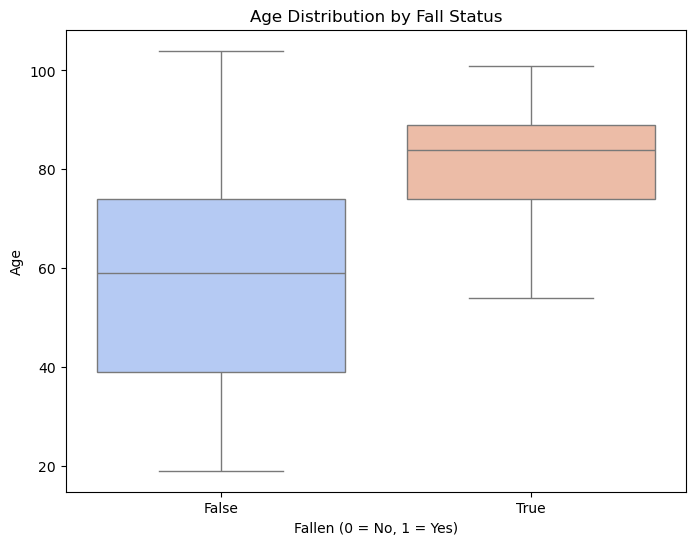

In [102]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["fallen"], y=df["age"], palette="coolwarm")
plt.xlabel("Fallen (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.title("Age Distribution by Fall Status")
plt.show()


**Observation:**

Here we can see, that the variable `age` seems to have a significant of impact on `fallen`.

/var/folders/1p/567_4j5x29v48vc1mvjyth400000gp/T/ipykernel_50653/97186582.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_counts = df_viz.groupby('age_group')['fall-risk_+'].value_counts().unstack()


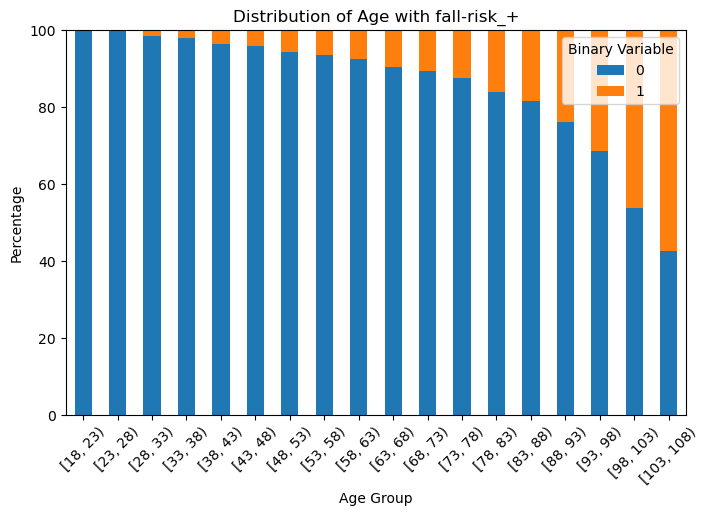

In [103]:
df_viz = df.copy()

# Define age bins
age_bins = range(18, 110, 5)  # 18-27, 28-37, ..., 78-84
df_viz['age_group'] = pd.cut(df_viz['age'], bins=age_bins, right=False)

# Count occurrences of 0 and 1 per age group
age_counts = df_viz.groupby('age_group')['fall-risk_+'].value_counts().unstack()

# Normalize to percentages
age_percent = age_counts.div(age_counts.sum(axis=1), axis=0) * 100

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
age_percent.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], ax=ax)

# Labels and customization
plt.xlabel("Age Group")
plt.ylabel("Percentage")
plt.title("Distribution of Age with fall-risk_+")
plt.legend(["0", "1"], title="Binary Variable")
plt.xticks(rotation=45)
plt.ylim(0, 100)

plt.show()

**Observation:**

`age` and `fall_risk_+` are highly correlated. This relationship is better illustrated visually, as calculating a correlation score between a continuous and a binary variable — especially when the data is skewed — can be misleading.

/var/folders/1p/567_4j5x29v48vc1mvjyth400000gp/T/ipykernel_50653/2492159077.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_counts = df_viz.groupby('age_group')['walk-balance_and_gait_impaired'].value_counts().unstack()


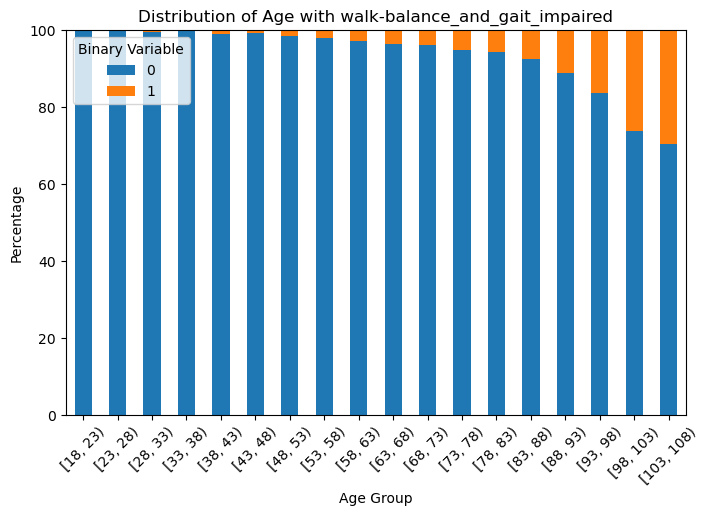

In [104]:
df_viz = df.copy()

# Define age bins
age_bins = range(18, 110, 5)  # 18-27, 28-37, ..., 78-84
df_viz['age_group'] = pd.cut(df_viz['age'], bins=age_bins, right=False)

# Count occurrences of 0 and 1 per age group
age_counts = df_viz.groupby('age_group')['walk-balance_and_gait_impaired'].value_counts().unstack()

# Normalize to percentages
age_percent = age_counts.div(age_counts.sum(axis=1), axis=0) * 100

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
age_percent.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], ax=ax)

# Labels and customization
plt.xlabel("Age Group")
plt.ylabel("Percentage")
plt.title("Distribution of Age with walk-balance_and_gait_impaired")
plt.legend(["0", "1"], title="Binary Variable")
plt.xticks(rotation=45)
plt.ylim(0, 100)

plt.show()

**Observation:**

Increasing `age` is also correlated with a higher likelihood of `walk-balance_and_gait_impaired`, one of the strongest predictors of patient falls.

Other visualizations with less meaningful variables are left-out. 

In [105]:
df_backup = df.copy()

In [124]:
binary_vars.remove("fallen")

In [125]:
print(binary_vars)

['medical_items-arm_or_leg_splint', 'medical_items-plaster_or_neck_brace', 'medical_items-compression_stocking', 'medical_items-ventilation_mask', 'medical_items-O2_glasses', 'medical_items-orthesis', 'medical_items-prosthesis', 'walk-balance_and_gait_impaired', 'walking_aid', 'excretions-incontinence', 'excretions-nykturie', 'cognition-disoriented_time', 'cognition-disoriented_location', 'cognition-disoriented_own_person', 'cognition-agitated', 'cognition-confused', 'fall-while_stay_False', 'fall-while_stay_True', 'fall-while_stay_Unknown', 'transfer-impairment_False', 'transfer-impairment_True', 'transfer-impairment_Unknown', 'bed_mobility-impairment_False', 'bed_mobility-impairment_True', 'bed_mobility-impairment_Unknown', 'excretions-impairment_False', 'excretions-impairment_True', 'excretions-impairment_Unknown', 'cognition-impairment_False', 'cognition-impairment_True', 'cognition-impairment_Unknown', 'walk-impairment_False', 'walk-impairment_True', 'walk-impairment_Unknown', 'fa

### 2.2 Feature Engineering Through MCA

`MCA` (Multiple Correspondence Analysis) is used for binary variables because it is a dimensionality reduction technique specifically designed for categorical data. It helps to uncover patterns and relationships between binary variables by projecting them into a lower-dimensional space, by transforming the binary variables into principal components.


This is particularly useful when dealing with a large number of binary features, as it reduces complexity while retaining the most important information.

In [126]:
# Subset the dataframe to only binary variables
df_mca = df[binary_vars]

# Perform MCA
mca = prince.MCA(n_components=3, random_state=42)
mca = mca.fit(df_mca)

# Transform data to get the new MCs
df_mcs = mca.transform(df_mca)
df_mcs.columns = ["MC1", "MC2", "MC3"]  # Naming first three MCs

In [127]:
df_mcs

,MC1,MC2,MC3
6690,-0.102536,0.028374,0.095790
35722,-0.090733,0.015647,0.007766
32809,-0.100118,0.039659,0.114347
10660,-0.107061,0.040593,-0.123145
33450,-0.060118,0.000139,-0.108222
...,...,...,...
8241,-0.061935,0.075681,0.092644
33347,-0.117054,0.039548,0.040268
16947,-0.048734,0.022757,-0.011233
7614,-0.070468,0.020919,-0.030002


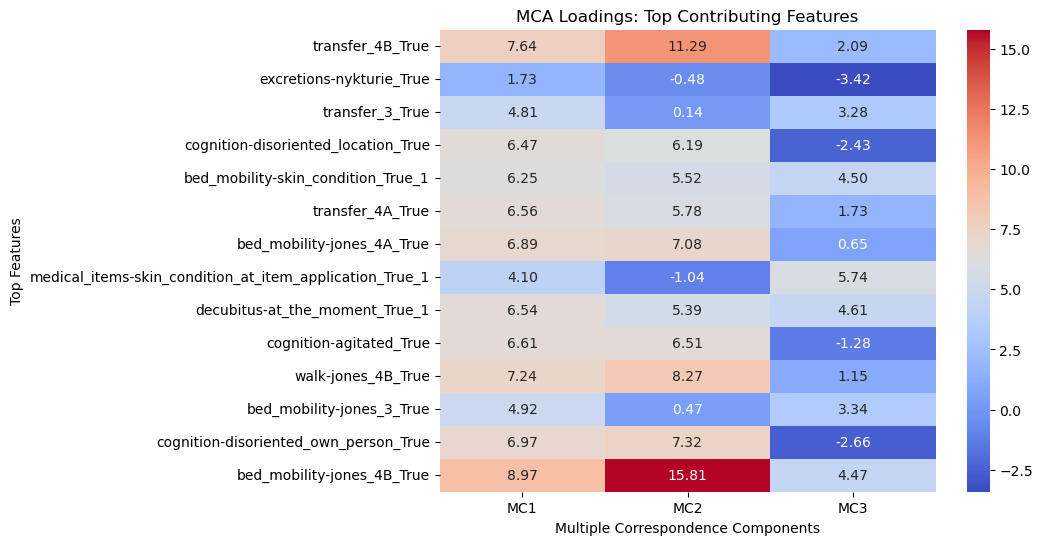

In [128]:
# Get loadings (column coordinates)
loadings = mca.column_coordinates(df_mca)

# Compute absolute values of loadings to measure contribution strength
abs_loadings = loadings.abs()

# Select top 7 features for each of the first three MCs
top_features = set()
for i in range(3):  # Loop over MC1, MC2, MC3
    top_features.update(abs_loadings.iloc[:, i].nlargest(7).index)

# Filter loadings to only include selected top features
loadings_filtered = loadings.loc[list(top_features), :3]
loadings_filtered.columns = ["MC1", "MC2", "MC3"]

# Plot the refined heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(loadings_filtered, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("MCA Loadings: Top Contributing Features")
plt.xlabel("Multiple Correspondence Components")
plt.ylabel("Top Features")
plt.show()

**Interpretation of MCA Loadings Heatmap:**

This heatmap displays the top contributing features (binary variables) across the first three MCA components: `MC1`, `MC2`, and `MC3`.
 - Each MCA component captures different patterns in the data — as shown by their distinct sets of strong feature loadings.

 **Notes:**
 - Interestingly, none of the features with high correlation (as seen in section `2.1`) or high SHAP values (as we will see later) appear in the top loadings of MC1, MC2, or MC3.
 - However, several low-importance features do contribute significantly to these MCA components. This suggests that while these features may be weak predictors individually, their combined structure captured through MCA yields components with high predictive power.



These MCA components are then added to the DataFrame as new columns for use in further analysis.

In [129]:
df = pd.concat([df, df_mcs], axis=1)

In [112]:
df.head()

,fallen,id,age,procedure,diagnosis,medical_items-arm_or_leg_splint,medical_items-plaster_or_neck_brace,medical_items-compression_stocking,medical_items-ventilation_mask,medical_items-O2_glasses,...,ICD10_T,ICD10_U,ICD10_V,ICD10_W,ICD10_X,ICD10_Y,ICD10_Z,MC1,MC2,MC3
6690,False,77363,49,0,G453,False,False,False,False,False,...,False,False,False,False,False,False,False,-0.102536,0.028374,0.095790
35722,False,80749,34,1-10,A010,False,False,False,False,False,...,False,False,False,False,False,False,False,-0.090733,0.015647,0.007766
32809,False,23355,39,0,J110,False,False,False,False,False,...,False,False,False,False,False,False,False,-0.100118,0.039659,0.114347
10660,False,36660,29,0,S100,False,False,False,False,False,...,False,False,False,False,False,False,False,-0.107061,0.040593,-0.123145
33450,False,15012,54,8-92,L210,False,False,False,False,False,...,False,False,False,False,False,False,False,-0.060118,0.000139,-0.108222


# Section 3: Model Development

In this section, we aim to develop predictive models to identify potentially endangered patients. 
 - We begin with a simple Logistic Regression model, focusing on interpreting feature importance through LogOdds without hyperparameter tuning. 

 - For the more complex model optimized for performance, we employed three different models: XGBoost, CatBoost, RandomForest.

 - Addditionaly, we alse employ two advanced approaches: the AutoML library `tpot`, which was executed multiple times over extended periods, and scikit-learn's `forward selection` method, limited to selecting up to ten variables. 

 - Our models are optimized for the `AUPRC` (Area Under the Precision-Recall Curve), prioritizing the ranking of at-risk patients over precise predictions. 
 Additionally, `recall` is emphasized to minimize the risk of overlooking any endangered individuals.

## 3.1 Simple Model: Logistic Regression

Recall: 0.15


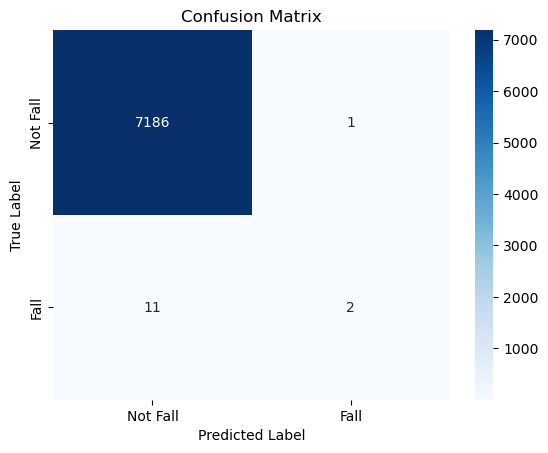

AUPRC: 0.26


In [113]:
# === Load Data ===
X = df.drop(columns=["fallen", "id", "procedure", "diagnosis", "ICD10_category", "procedure_category"])  # Features
y = df["fallen"]  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = recall_score(y_test, y_pred)
print(f"Recall: {accuracy:.2f}")

# === Step 8: Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred)  # Use y_test instead of y
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fall", "Fall"], yticklabels=["Not Fall", "Fall"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Calculate Precision-Recall curve and AUPRC
precision, recall, _ = precision_recall_curve(y_test, y_probs)
auprc = auc(recall, precision)

print(f"AUPRC: {auprc:.2f}")


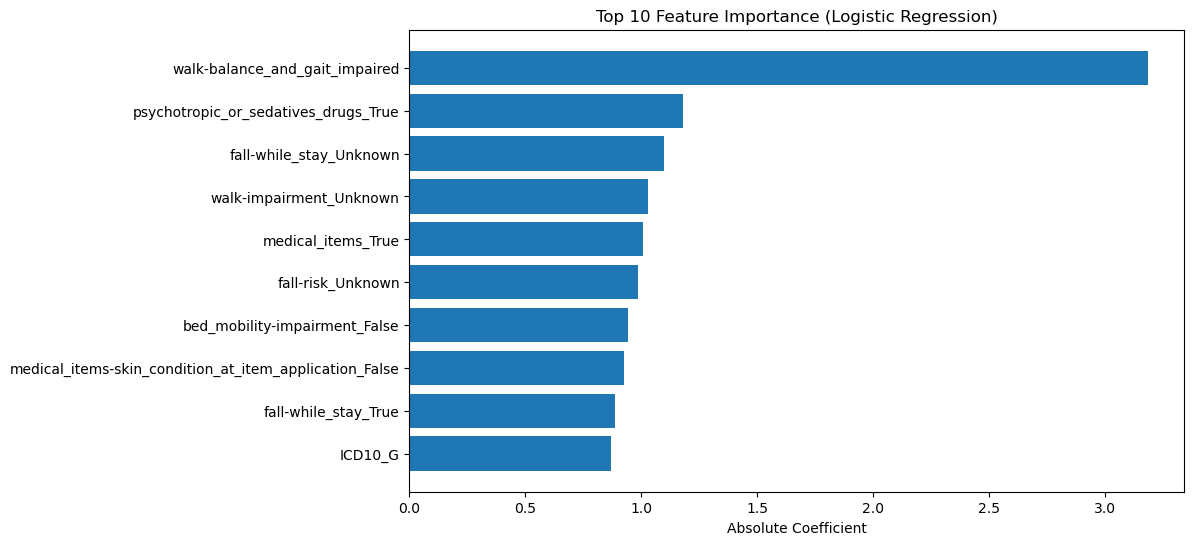

In [114]:
# Get the coefficients of the logistic regression model
coefficients = model.coef_[0]

# Create a DataFrame to display features and their importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Absolute Coefficient': abs(coefficients)
})

# Sort by absolute coefficient value to show most important features in descending order
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Get the top 10 most important features
top_10_features = feature_importance.head(10)

# Plot the top 10 most important features (largest bars at the top)
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Absolute Coefficient'])
plt.xlabel('Absolute Coefficient')
plt.title('Top 10 Feature Importance (Logistic Regression)')
plt.gca().invert_yaxis()  # Inverts the y-axis to place the largest feature at the top
plt.show()

**Interpretation of the Logistic Regression:**

The Logistic Regression already shows a decent performance both on the AUPRC. 

- Dominant Influence of Gait Impairment:'walk-balance_and_gait_impaired' stands out with a much higher coefficient (~3.2) than any other feature. This suggests that mobility issues, especially related to balance and gait, are by far the strongest predictor of falling in the dataset.

 - Medication and Cognitive Indicators: 'psychotropic_or_sedatives_drugs_True' also plays a significant role. These medications are known to affect balance, alertness, and coordination, which increases fall risk.

- Features like 'fall-while_stay_Unknown' and 'walk-impairment_Unknown' indicate that missing or unrecorded clinical information hold predictive power since it was only recorded for patients in risk.



## 3.2 Complex Model

We are going to tune more complex models in this section for their AUPRC. To do so systematically we always employ the same pipeline. 

In the pipeline GridSearchCV is used on a paramter space and the best model is then tested on the test set for its performance.

Then the AURPC is printed out and its probability distribution to check for validity.

### 3.2.1 Random Forest

In [115]:
def rf_pipeline(df):
    """
    Trains and evaluates a Random Forest model with hyperparameter tuning,
    finds the best threshold for recall/precision, and visualizes performance.

    Args:
        df (pd.DataFrame): The cleaned dataset.

    Returns:
        dict: Model performance metrics.
    """

    X = df.drop(columns=["fallen", "id", "procedure", "diagnosis", "ICD10_category", "procedure_category"])  # Features
    y = df["fallen"]  # Target

    # Split train/test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # === Step 1: Hyperparameter Tuning using GridSearchCV ===
    param_grid = {
        'n_estimators': [100, 200],  # Number of trees
        'max_depth': [None, 10, 20],  # Maximum depth of the tree
        'min_samples_split': [2, 5],  # Minimum number of samples required to split a node
        'min_samples_leaf': [1, 2],  # Minimum number of samples required at a leaf node
        'max_features': ['sqrt', 'log2'],  # Number of features to consider for splitting
        'random_state': [42]
    }

    # Initialize the RandomForestClassifier
    rf_model = RandomForestClassifier(random_state=42)

    grid_search = GridSearchCV(rf_model, param_grid, scoring="average_precision", cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Best model after tuning
    best_rf_classifier = grid_search.best_estimator_

    # Print the best parameters and best score
    print("\nBest parameters found:")
    print(grid_search.best_params_)
    print(f"Best cross-validation average precision: {grid_search.best_score_:.4f}")

    # Train the best model on the full training set
    best_rf_classifier.fit(X_train, y_train)

    # Evaluate on test set
    y_pred_rf = best_rf_classifier.predict(X_test)
    print(np.unique(y_pred_rf, return_counts=True))

    print("\nTest set performance with optimized hyperparameters:")
    print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
    print(classification_report(y_test, y_pred_rf))

    # === Step 2: Cross-Validation Prediction for Evaluation ===
    cv = StratifiedKFold(n_splits=5)
    y_probs_rf = cross_val_predict(best_rf_classifier, X, y, cv=cv, method="predict_proba")[:, 1]

    # === Step 3: Compute AUC-PR ===
    precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y, y_probs_rf)
    auc_pr_rf = auc(recall_rf, precision_rf)

    print(f"AUC-PR Score: {auc_pr_rf:.4f}")

    # === Step 4: Plot Precision-Recall Curve ===
    plt.figure(figsize=(8, 6))
    plt.plot(recall_rf, precision_rf, marker=".", label=f"AUC-PR = {auc_pr_rf:.4f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve (Random Forest)")
    plt.legend()
    plt.grid()
    plt.show()

    # === Step 5: Histogram of Prediction Probabilities ===
    plt.figure(figsize=(8, 6))
    plt.hist(y_probs_rf, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title("Histogram of Predicted Fall Probabilities (Random Forest)")
    plt.xlabel("Predicted Probability of Fall (fallen=1)")
    plt.ylabel("Frequency")
    plt.yscale('log')
    plt.grid(True)
    plt.show()

    # === Step 6: Find Best Threshold for Recall-Precision Tradeoff ===
    best_threshold_rf = thresholds_rf[np.argmax(precision_rf * recall_rf)]
    print(f"Best Threshold for Precision-Recall Balance: {best_threshold_rf:.4f}")

    # Apply the best threshold
    y_pred_rf_thresholded = (y_probs_rf >= best_threshold_rf).astype(int)

    # === Step 7: Confusion Matrix ===
    cm_rf = confusion_matrix(y, y_pred_rf_thresholded)
    sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fall", "Fall"], yticklabels=["Not Fall", "Fall"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Random Forest Confusion Matrix")
    plt.show()

    # === Step 8: Feature Importance ===
    feature_importances_rf = pd.DataFrame(
        {"Feature": X.columns, "Importance": best_rf_classifier.feature_importances_}
    ).sort_values(by="Importance", ascending=False)

    print("Top 10 Important Features:")
    print(feature_importances_rf.head(10))


Best parameters found:
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200, 'random_state': 42}
Best cross-validation average precision: 0.2996
(array([False]), array([7200], dtype=int64))

Test set performance with optimized hyperparameters:
Recall: 0.0000
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      7183
        True       0.00      0.00      0.00        17

    accuracy                           1.00      7200
   macro avg       0.50      0.50      0.50      7200
weighted avg       1.00      1.00      1.00      7200



c:\Users\felix\anaconda3\envs\tpotenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\felix\anaconda3\envs\tpotenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\felix\anaconda3\envs\tpotenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


AUC-PR Score: 0.2684


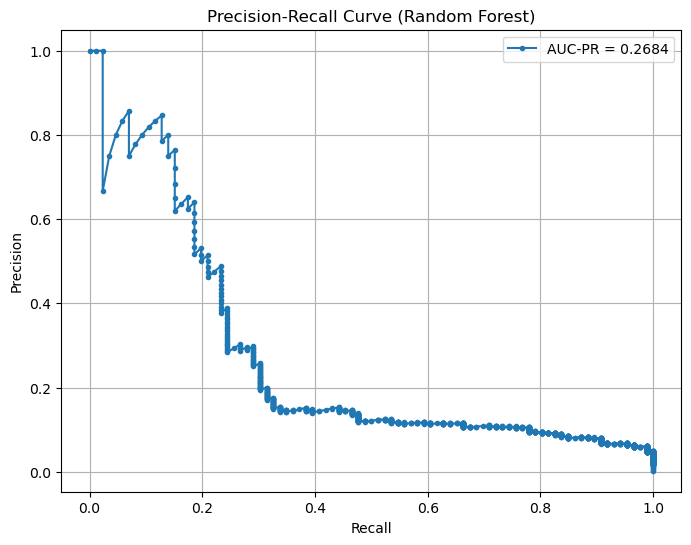

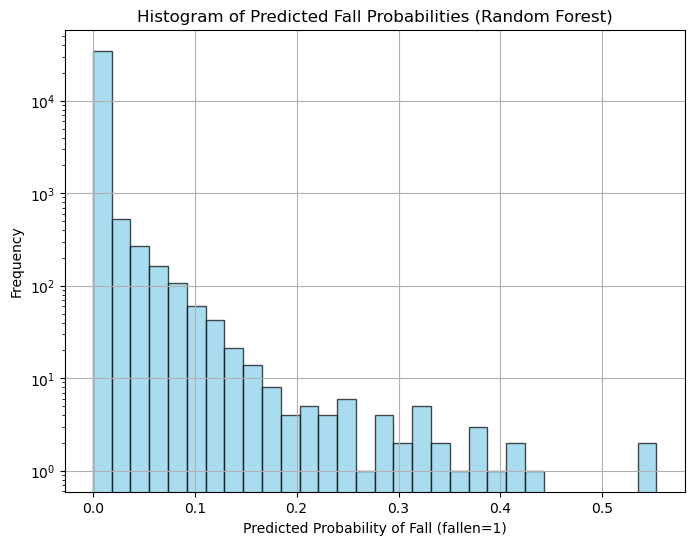

Best Threshold for Precision-Recall Balance: 0.2580


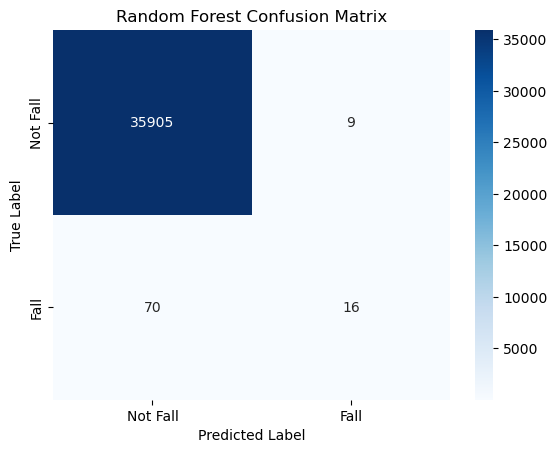

Top 10 Important Features:
                            Feature  Importance
124                             MC3    0.097153
122                             MC1    0.071396
19             fall-while_stay_True    0.070657
123                             MC2    0.068094
9    walk-balance_and_gait_impaired    0.056321
0                               age    0.035360
75                     walk-jones_1    0.017989
20          fall-while_stay_Unknown    0.017581
8       fall-how_many_last_12_month    0.017303
103                         ICD10_G    0.015623


In [ ]:
rf_pipeline(df)

### 3.2.2 CatBoost

In [ ]:

def cat_pipeline(df):
    """
    Trains and evaluates a Decision Tree model with hyperparameter tuning,
    finds the best threshold for recall/precision, and visualizes performance.

    Args:
        df (pd.DataFrame): The cleaned dataset.
        target_col (str): Target variable name.
        test_size (float): Train-test split ratio.
        random_state (int): Random seed for reproducibility.

    Returns:
        dict: Model performance metrics.
    """


    X = df.drop(columns=["fallen", "id", "procedure", "diagnosis", "ICD10_category", "procedure_category"])  # Features
    y = df["fallen"]  # Target

    # Split train/test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Define categorical features
    all_features = set(X.columns)  # Convert to set for set operations
    non_cat_features = {"age", "fall-how_many_last_12_month", "MC1", "MC2", "MC3"}  # Define explicitly
    cat_features = list(all_features.difference(non_cat_features))  # Ensure correct conversion

    train_pool = Pool(X_train, label=y_train, cat_features=cat_features)
    # Train a CatBoost model
    model = CatBoostClassifier(verbose=False)


    param_grid = {
        'iterations': [100, 200],
        'depth': [4, 6],
        'learning_rate': [0.01, 0.1]
    }

    # === Step 2: Hyperparameter Tuning using GridSearchCV ===
    grid_search = GridSearchCV(model, param_grid, scoring="average_precision", cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Best model after tuning
    best_classifier = grid_search.best_estimator_

    # # Print the best parameters and best score
    print("\nBest parameters found:")
    print(grid_search.best_params_)
    print(f"Best cross-validation average precision: {grid_search.best_score_:.4f}")



    # # Train a model with the best parameters
    best_classifier.fit(X_train, y_train)

    # Evaluate on test set
    y_pred_best_classifier = best_classifier.predict(X_test)
    print(np.unique(y_pred_best_classifier, return_counts=True))

    print("\nTest set performance with optimized hyperparameters:")
    print(f"Recall: {recall_score(y_test, y_pred_best_classifier):.4f}")
    print(classification_report(y_test, y_pred_best_classifier))


    # # === Step 3: Cross-Validation Prediction for Evaluation ===
    cv = StratifiedKFold(n_splits=5)
    y_probs = cross_val_predict(best_classifier, X, y, cv=cv, method="predict_proba")[:, 1]



    # # === Step 4: Compute AUC-PR ===
    precision, recall, thresholds = precision_recall_curve(y, y_probs)
    auc_pr = auc(recall, precision)

    print(f"AUC-PR Score: {auc_pr:.4f}")

    # === Step 5: Plot Precision-Recall Curve ===
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker=".", label=f"AUC-PR = {auc_pr:.4f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()
    plt.grid()
    plt.show()

    # === Step 6: Histogram of Prediction Probabilities ===
    plt.figure(figsize=(8, 6))
    plt.hist(y_probs, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title("Histogram of Predicted Fall Probabilities")
    plt.xlabel("Predicted Probability of Fall (fallen=1)")
    plt.ylabel("Frequency")

    # Apply logarithmic scale to y-axis
    plt.yscale('log')
    plt.grid(True)
    plt.show()

    # === Step 7: Find Best Threshold for Recall-Precision Tradeoff ===
    best_threshold = thresholds[np.argmax(precision * recall)]
    print(f"Best Threshold for Precision-Recall Balance: {best_threshold:.4f}")

    # Apply the best threshold
    y_pred = (y_probs >= best_threshold).astype(int)

    # === Step 8: Confusion Matrix ===
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fall", "Fall"], yticklabels=["Not Fall", "Fall"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

    # === Step 9: Feature Importance ===
    feature_importances = pd.DataFrame(
        {"Feature": X.columns, "Importance": best_classifier.feature_importances_}
    ).sort_values(by="Importance", ascending=False)

    print("Top 10 Important Features:")
    print(feature_importances.head(30))

     # # Compute SHAP values
    explainer = shap.TreeExplainer(best_classifier)
    shap_values = explainer(X_train)

    shap.plots.waterfall(shap_values[0])

    shap.plots.bar(shap_values)

    shap.plots.beeswarm(shap_values)




Best parameters found:
{'depth': 4, 'iterations': 100, 'learning_rate': 0.01}
Best cross-validation average precision: 0.3021
(array([False]), array([7200], dtype=int64))

Test set performance with optimized hyperparameters:
Recall: 0.0000
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      7183
        True       0.00      0.00      0.00        17

    accuracy                           1.00      7200
   macro avg       0.50      0.50      0.50      7200
weighted avg       1.00      1.00      1.00      7200



c:\Users\felix\anaconda3\envs\tpotenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\felix\anaconda3\envs\tpotenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\felix\anaconda3\envs\tpotenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


AUC-PR Score: 0.2311


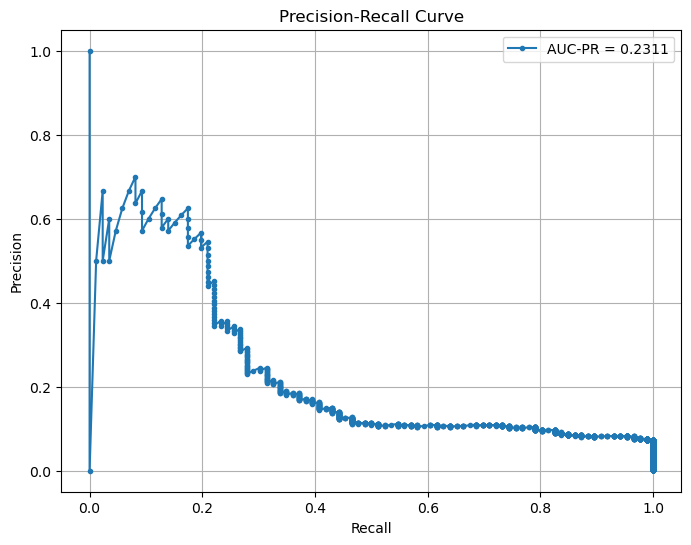

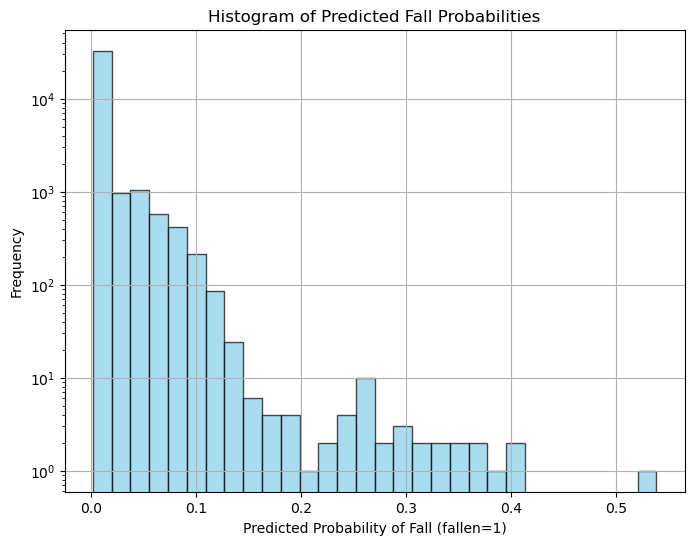

Best Threshold for Precision-Recall Balance: 0.2183


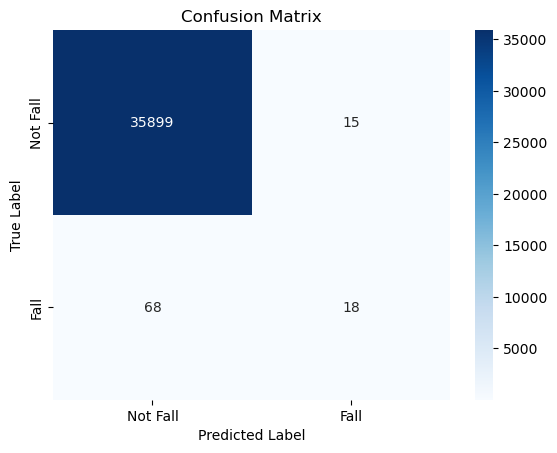

Top 10 Important Features:
                             Feature  Importance
85                       fall-risk_+   31.876393
122                              MC1   27.536557
123                              MC2    5.728997
9     walk-balance_and_gait_impaired    4.286445
88                 fall-risk_Unknown    3.752313
124                              MC3    3.323723
34              walk-impairment_True    2.925491
35           walk-impairment_Unknown    2.899131
105                          ICD10_I    2.131011
0                                age    1.661430
33             walk-impairment_False    1.038864
95              procedure_category_9    0.700613
84            decubitus-risk_Unknown    0.613772
75                      walk-jones_1    0.566537
21         transfer-impairment_False    0.557549
81                  decubitus-risk_+    0.525721
19              fall-while_stay_True    0.501072
25      bed_mobility-impairment_True    0.461159
80                walk-jones_Unknown    0.

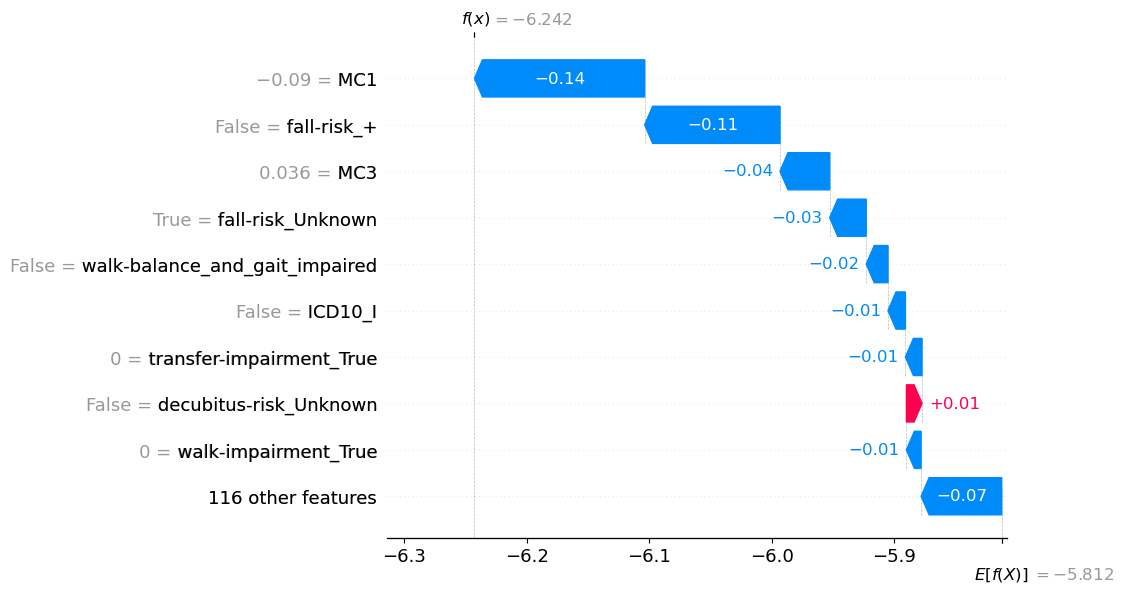

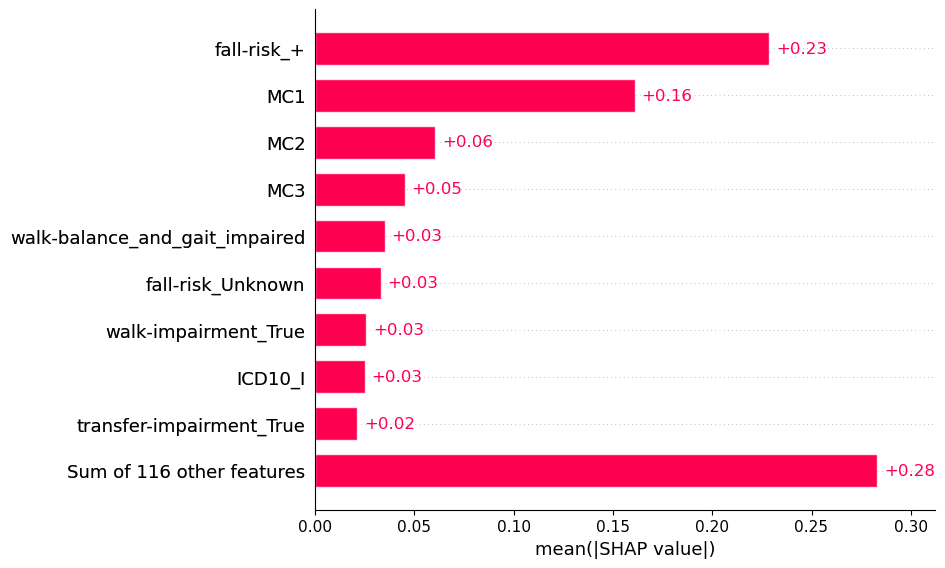

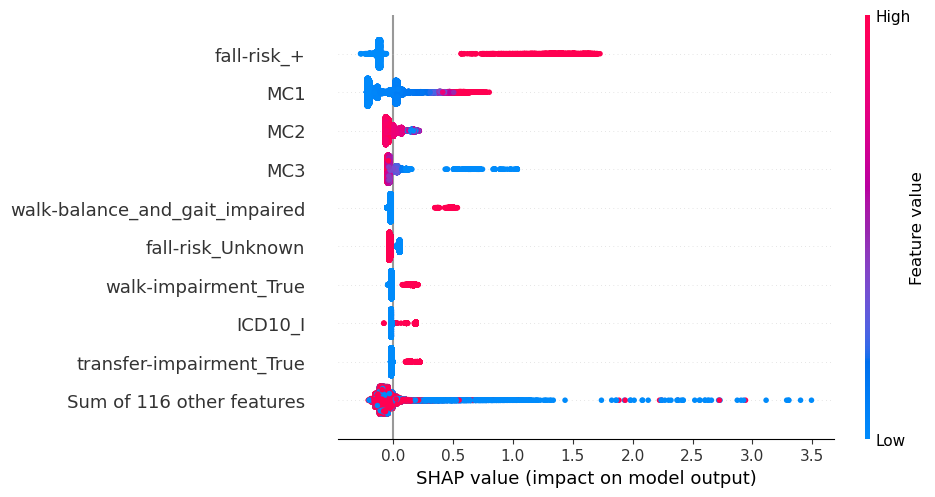

In [ ]:
cat_pipeline(df)

### 3.2.3 XGBoost

In [ ]:

def xgb_pipeline(df):
    """
    Trains and evaluates a Decision Tree model with hyperparameter tuning,
    finds the best threshold for recall/precision, and visualizes performance.

    Args:
        df (pd.DataFrame): The cleaned dataset.
        target_col (str): Target variable name.
        test_size (float): Train-test split ratio.
        random_state (int): Random seed for reproducibility.

    Returns:
        dict: Model performance metrics.
    """


    # === Load Data ===
    X = df.drop(columns=["fallen", "id", "procedure", "diagnosis", "ICD10_category", "procedure_category"])  # Features
    y = df["fallen"]  # Target

    # Split train/test sets
    # Use stratified sampling to ensure balanced class distribution
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )


    # === Step 1: Define Model & Parameter Grid ===
    model = xgb.XGBClassifier()

    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [3, 6],
        'learning_rate': [0.01, 0.1]
    }

    # === Step 2: Hyperparameter Tuning using GridSearchCV ===
    grid_search = GridSearchCV(model, param_grid, scoring="average_precision", cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Best model after tuning
    best_classifier = grid_search.best_estimator_

    # Print the best parameters and best score
    print("\nBest parameters found:")
    print(grid_search.best_params_)
    print(f"Best cross-validation average precision: {grid_search.best_score_:.4f}")



    # Train a model with the best parameters
    best_classifier.fit(X_train, y_train)

    # Evaluate on test set
    y_pred_best_classifier = best_classifier.predict(X_test)
    print(np.unique(y_pred_best_classifier, return_counts=True))

    print("\nTest set performance with optimized hyperparameters:")
    print(f"Recall: {recall_score(y_test, y_pred_best_classifier):.4f}")
    print(classification_report(y_test, y_pred_best_classifier))


    # === Step 3: Cross-Validation Prediction for Evaluation ===
    cv = StratifiedKFold(n_splits=5)
    y_probs = cross_val_predict(best_classifier, X, y, cv=cv, method="predict_proba")[:, 1]



    # === Step 4: Compute AUC-PR ===
    precision, recall, thresholds = precision_recall_curve(y, y_probs)
    auc_pr = auc(recall, precision)
    roc_auc = roc_auc_score(y, y_probs)

    print(f"AUC-PR Score: {auc_pr:.4f}")

    # === Step 5: Plot Precision-Recall Curve ===
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker=".", label=f"AUC-PR = {auc_pr:.4f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()
    plt.grid()
    plt.show()

    # === Step 6: Histogram of Prediction Probabilities ===
    plt.figure(figsize=(8, 6))
    plt.hist(y_probs, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title("Histogram of Predicted Fall Probabilities")
    plt.xlabel("Predicted Probability of Fall (fallen=1)")
    plt.ylabel("Frequency")

    # Apply logarithmic scale to y-axis
    plt.yscale('log')
    plt.grid(True)
    plt.show()

    # === Step 7: Find Best Threshold for Recall-Precision Tradeoff ===
    best_threshold = thresholds[np.argmax(precision * recall)]
    print(f"Best Threshold for Precision-Recall Balance: {best_threshold:.4f}")

    # Apply the best threshold
    y_pred = (y_probs >= best_threshold).astype(int)

    # === Step 8: Confusion Matrix ===
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fall", "Fall"], yticklabels=["Not Fall", "Fall"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

    # === Step 9: Feature Importance ===
    feature_importances = pd.DataFrame(
        {"Feature": X.columns, "Importance": best_classifier.feature_importances_}
    ).sort_values(by="Importance", ascending=False)

    print("Top 10 Important Features:")
    print(feature_importances.head(30))

    print("Shap Values for the train set")
    explainer = shap.TreeExplainer(best_classifier)
    shap_values_train = explainer(X_train)

    shap.plots.waterfall(shap_values_train[0])

    shap.plots.bar(shap_values_train)
    shap.summary_plot(shap_values_train, X_train, plot_type="bar")

    shap.plots.beeswarm(shap_values_train)

    print("Shap Values for the test set")
    shap_values_test = explainer(X_test)
    shap.plots.waterfall(shap_values_test[0])

    shap.plots.bar(shap_values_test)
    shap.summary_plot(shap_values_test, X_test, plot_type="bar")

    shap.plots.beeswarm(shap_values_test)



Best parameters found:
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best cross-validation average precision: 0.2857
(array([0]), array([7200], dtype=int64))

Test set performance with optimized hyperparameters:
Recall: 0.0000
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      7183
        True       0.00      0.00      0.00        17

    accuracy                           1.00      7200
   macro avg       0.50      0.50      0.50      7200
weighted avg       1.00      1.00      1.00      7200



c:\Users\felix\anaconda3\envs\tpotenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\felix\anaconda3\envs\tpotenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\felix\anaconda3\envs\tpotenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


AUC-PR Score: 0.2208


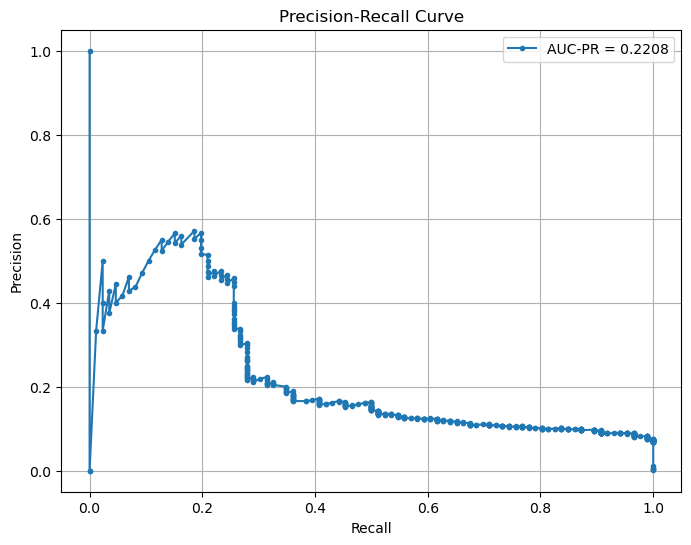

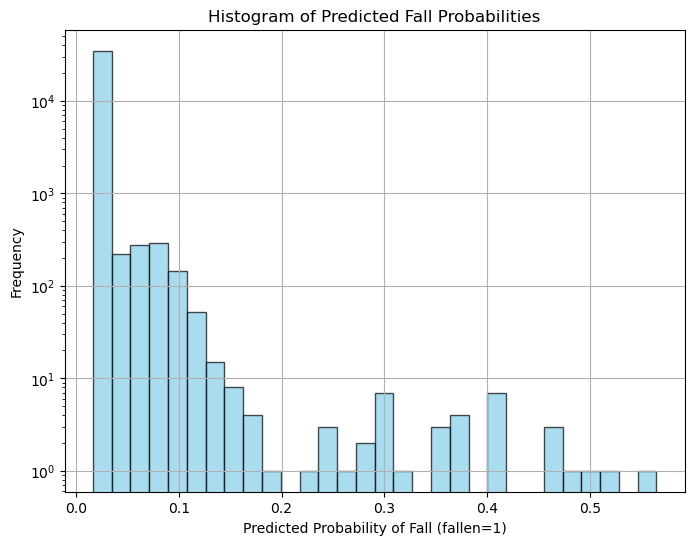

Best Threshold for Precision-Recall Balance: 0.1481


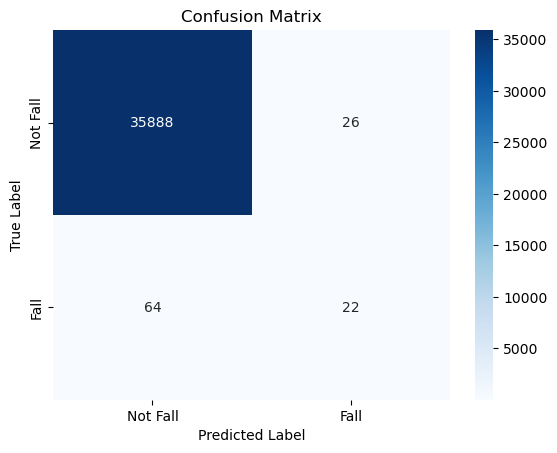

Top 10 Important Features:
                            Feature  Importance
9    walk-balance_and_gait_impaired    0.334536
19             fall-while_stay_True    0.129367
122                             MC1    0.043804
25     bed_mobility-impairment_True    0.041508
45              medical_items_False    0.041399
47            medical_items_Unknown    0.040899
46               medical_items_True    0.040168
103                         ICD10_G    0.040159
60                       sex_female    0.037487
75                     walk-jones_1    0.035695
124                             MC3    0.034143
84           decubitus-risk_Unknown    0.030257
100                         ICD10_D    0.028616
8       fall-how_many_last_12_month    0.026602
105                         ICD10_I    0.025869
30       cognition-impairment_False    0.024931
123                             MC2    0.024061
40          fall-last_12_month_True    0.020499
72            bed_mobility-jones_4A    0.000000
90           

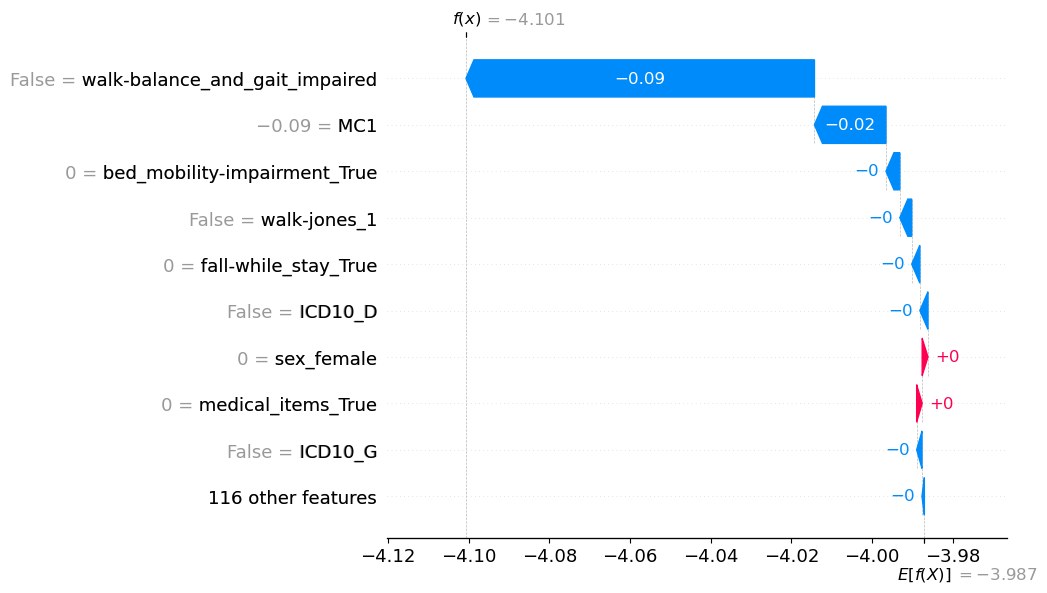

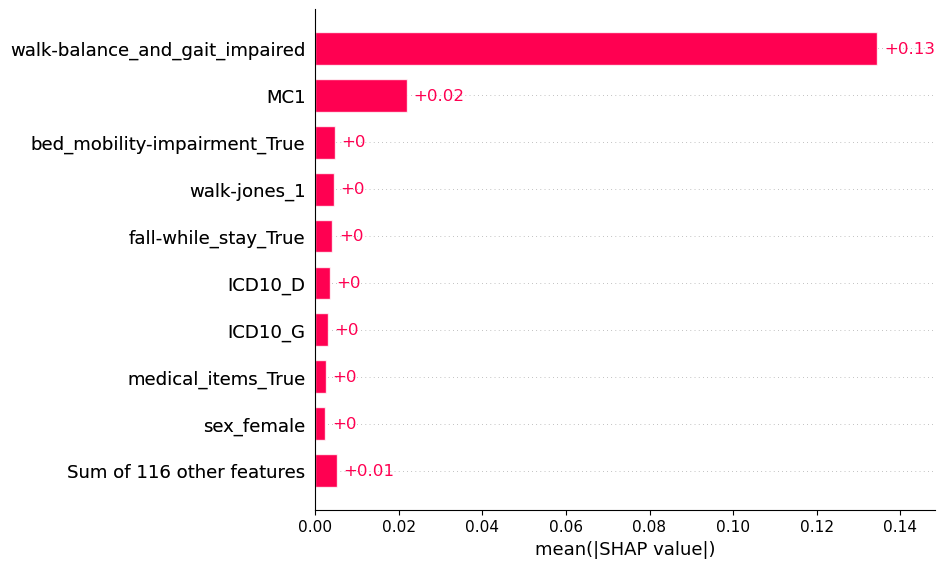

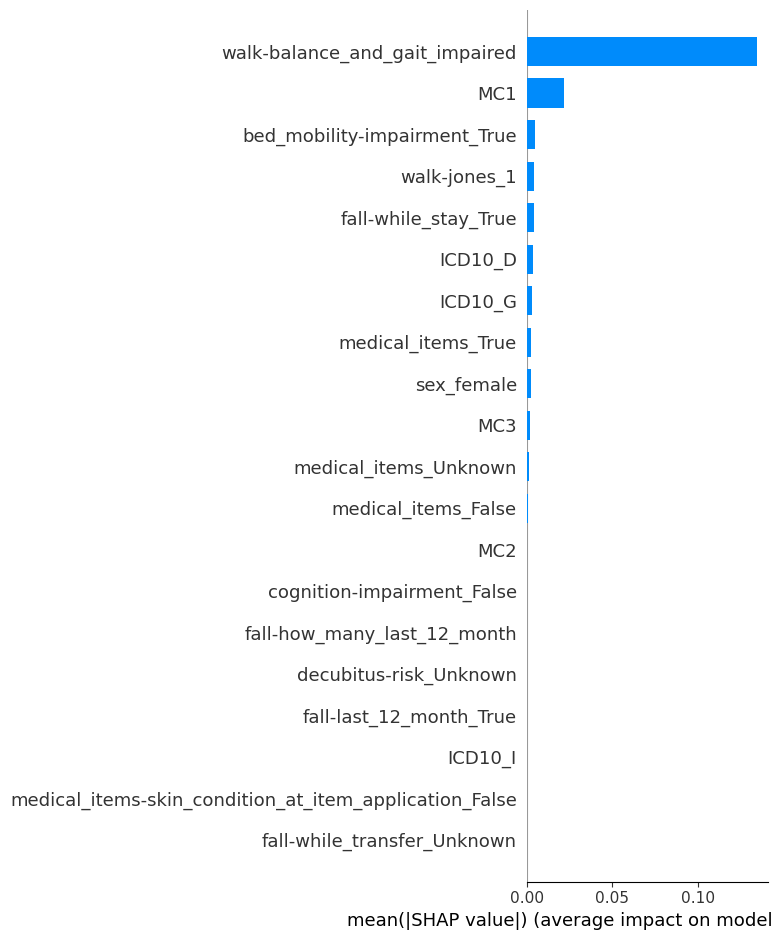

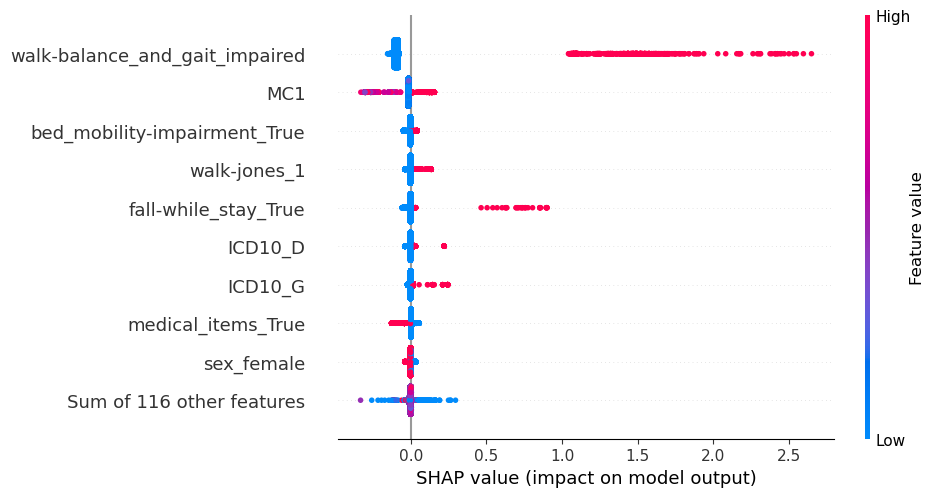

Shap Values for the test set


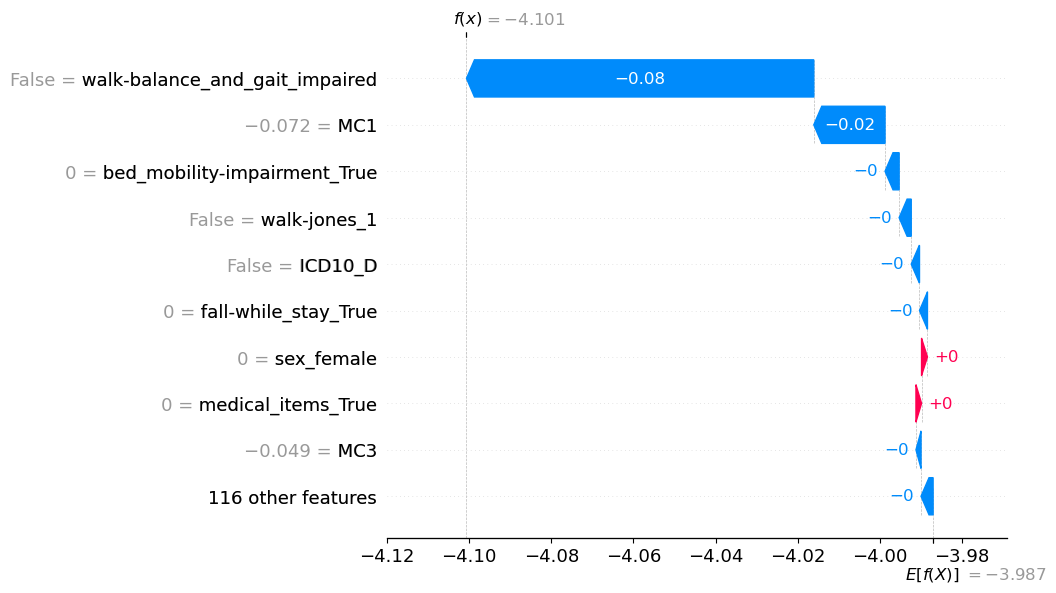

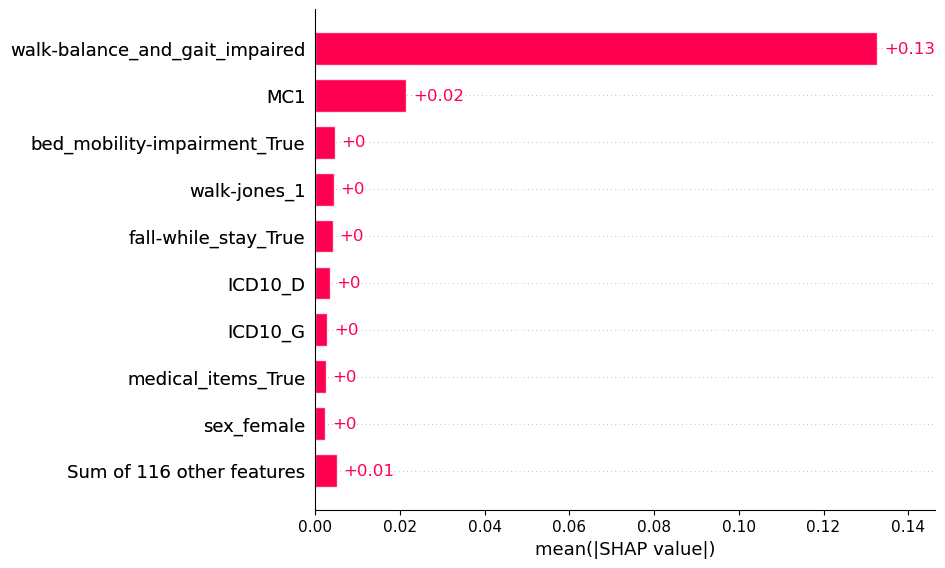

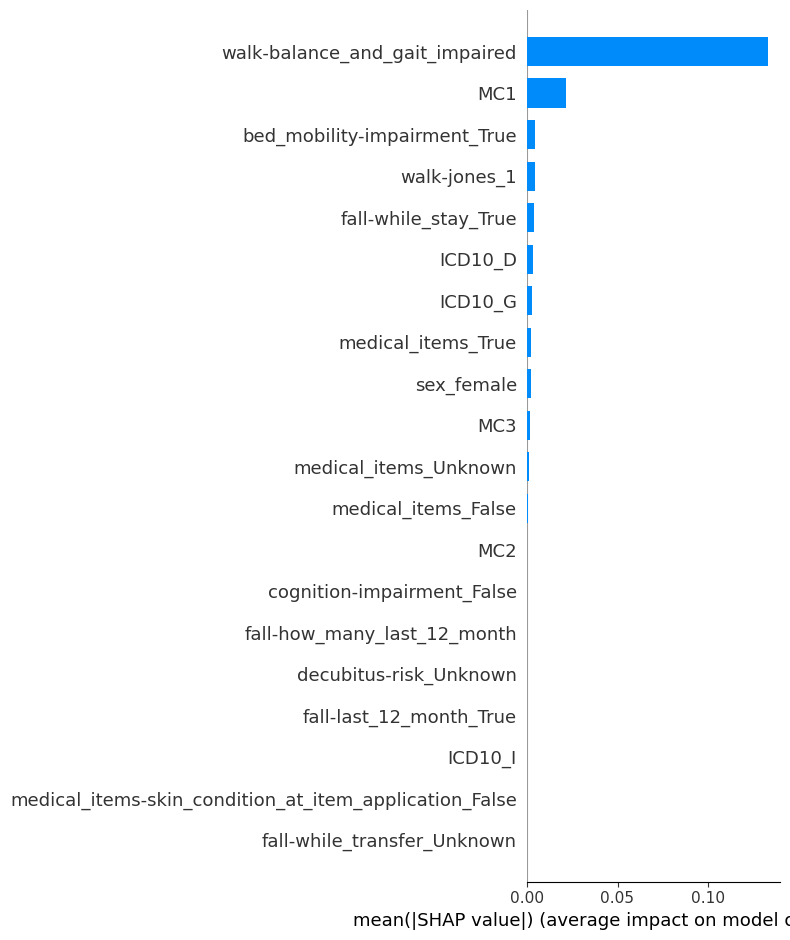

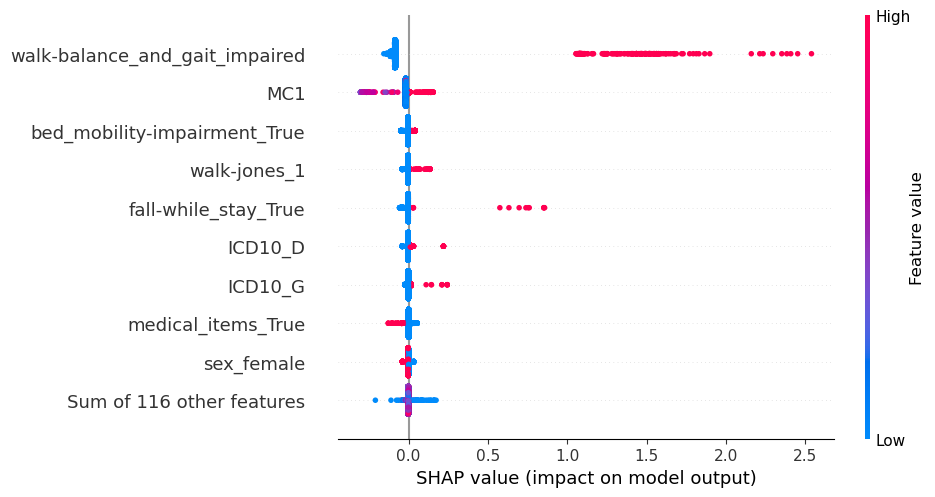

In [ ]:
xgb_pipeline(df)

### Summary for Complex Model

Model Comparison Summary: Predicting Patient Fall Risk
In this section, we evaluated three advanced models — Random Forest, CatBoost, and XGBoost — to identify patients at risk of falling. Our models were optimized for AUPRC (Area Under the Precision-Recall Curve), emphasizing ranking quality over exact class predictions.

**Model Performance (AUPRC)**
| Model         | AUPRC  | Notes                                            |
|---------------|--------|--------------------------------------------------|
| Random Forest | 0.2684 | Best overall ranking performance                 |
| CatBoost      | 0.2311 | Strong interpretability via SHAP                |
| XGBoost       | 0.2208 | Similar to CatBoost, more focus on medical indicators |

All models demonstrate reasonable ranking ability, with Random Forest slightly outperforming the others in AUPRC.

**Feature Importance & SHAP Interpretation**
Consistently Important Features Across Models
Several features appear across all three models, indicating robust predictive value:

walk-balance_and_gait_impaired: Most dominant in XGBoost and highly ranked in all models.

MCA components (MC1, MC2, MC3): Frequently appear among the top features, validating the use of dimensionality reduction for binary data.

fall-while_stay_True and ICD10_G: Reflect clinical and hospitalization context.

**SHAP Insights**
**CatBoost SHAP:**

fall-risk_+ has the highest SHAP impact, with high values significantly increasing predicted risk.

MCA components (MC1–MC3) also show strong influence.

**XGBoost SHAP:**

walk-balance_and_gait_impaired and MC1 dominate.

Other medical and demographic variables have smaller but consistent contributions.

**Conclusion**
- Random Forest is the best-performing model based on AUPRC.

- SHAP analysis across CatBoost and XGBoost confirms clinical relevance of mobility impairments, fall history, and dimensionality-reduced patterns (MCA).

- Consistent top features across models provide confidence in their predictive validity.

- MCA successfully transforms weak individual signals into meaningful aggregated predictors.


### 3.2.4 Forward Selection

To further improve the model, we execute Forware Selection for the best performing model Random Forest.

In [ ]:
# === Load Data ===
X = df.drop(columns=["fallen", "id", "procedure", "diagnosis", "ICD10_category", "procedure_category"])  # Features
y = df["fallen"]  # Target

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the Random Forest model with specified hyperparameters
rf_model = RandomForestClassifier(
    n_estimators=20,
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)

# Set up the SequentialFeatureSelector with forward selection
selector = SequentialFeatureSelector(
    estimator=rf_model,
    n_features_to_select=10,
    direction='forward',  # Forward selection
    scoring='average_precision',  # AUPRC scoring
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Use all CPUs
)

# Fit the feature selector on the training data
selector.fit(X_train, y_train)

# Get the selected feature indices and names
selected_features = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_features]

print(f"Selected feature indices: {selected_features}")

Selected feature indices: [  0   9  19  37  55  56  63  75 111 123]


In [ ]:
print(f"Selected feature names: {selected_feature_names.tolist()}")

Selected feature names: ['age', 'walk-balance_and_gait_impaired', 'fall-while_stay_True', 'fall-while_transfer_True', 'psychotropic_or_sedatives_drugs_True', 'psychotropic_or_sedatives_drugs_Unknown', 'transfer_1', 'walk-jones_1', 'ICD10_O', 'MC2']


See above for the 10 most important features.

In [130]:
columns_to_keep = [
    "fallen", "id", "procedure", "diagnosis", "ICD10_category", "procedure_category",
    "age", "walk-balance_and_gait_impaired", "fall-while_stay_True",
    "fall-while_transfer_True", "psychotropic_or_sedatives_drugs_True",
    "psychotropic_or_sedatives_drugs_Unknown", "transfer_1", "walk-jones_1",
    "ICD10_O", "MC2"
]

# Keep only these columns in the DataFrame
df_filtered = df[columns_to_keep]


Best parameters found:
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}
Best cross-validation average precision: 0.3283
(array([False,  True]), array([7196,    4], dtype=int64))

Test set performance with optimized hyperparameters:
Recall: 0.1176
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      7183
        True       0.50      0.12      0.19        17

    accuracy                           1.00      7200
   macro avg       0.75      0.56      0.59      7200
weighted avg       1.00      1.00      1.00      7200

AUC-PR Score: 0.2790


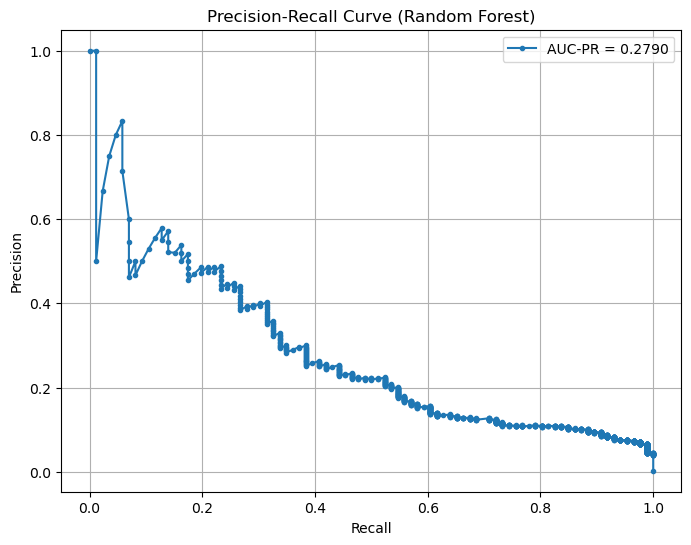

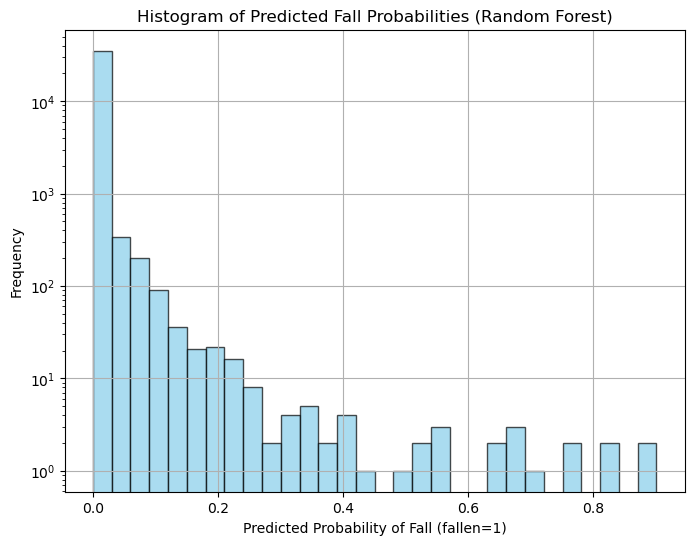

Best Threshold for Precision-Recall Balance: 0.1974


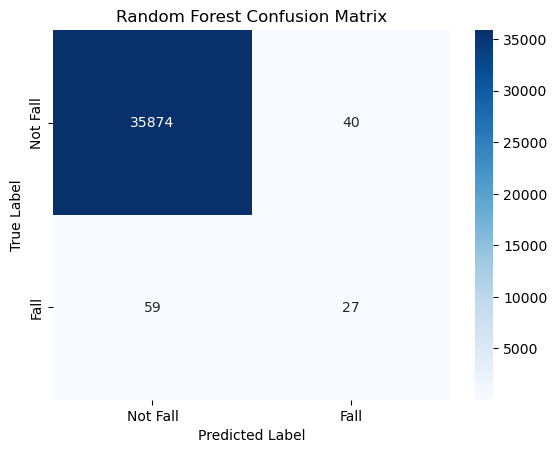

Top 10 Important Features:
                                   Feature  Importance
9                                      MC2    0.439760
0                                      age    0.155585
2                     fall-while_stay_True    0.133393
1           walk-balance_and_gait_impaired    0.093889
7                             walk-jones_1    0.052165
3                 fall-while_transfer_True    0.044363
5  psychotropic_or_sedatives_drugs_Unknown    0.042357
6                               transfer_1    0.017751
4     psychotropic_or_sedatives_drugs_True    0.013035
8                                  ICD10_O    0.007702


In [131]:
X = df_filtered.drop(columns=["fallen", "id", "procedure", "diagnosis", "ICD10_category", "procedure_category"])  # Features
y = df_filtered["fallen"]  # Target

# Split train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === Step 1: Hyperparameter Tuning using GridSearchCV ===
param_grid = {
    'n_estimators': [100, 200],  # Number of trees
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2],  # Minimum number of samples required at a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider for splitting
    'random_state': [42]
}

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf_model, param_grid, scoring="average_precision", cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model after tuning
best_rf_classifier = grid_search.best_estimator_

# Print the best parameters and best score
print("\nBest parameters found:")
print(grid_search.best_params_)
print(f"Best cross-validation average precision: {grid_search.best_score_:.4f}")

# Train the best model on the full training set
best_rf_classifier.fit(X_train, y_train)

# Evaluate on test set
y_pred_rf = best_rf_classifier.predict(X_test)
print(np.unique(y_pred_rf, return_counts=True))

print("\nTest set performance with optimized hyperparameters:")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf))

# === Step 2: Cross-Validation Prediction for Evaluation ===
cv = StratifiedKFold(n_splits=5)
y_probs_rf = cross_val_predict(best_rf_classifier, X, y, cv=cv, method="predict_proba")[:, 1]

# === Step 3: Compute AUC-PR ===
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y, y_probs_rf)
auc_pr_rf = auc(recall_rf, precision_rf)

print(f"AUC-PR Score: {auc_pr_rf:.4f}")

# === Step 4: Plot Precision-Recall Curve ===
plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, marker=".", label=f"AUC-PR = {auc_pr_rf:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Random Forest)")
plt.legend()
plt.grid()
plt.show()

# === Step 5: Histogram of Prediction Probabilities ===
plt.figure(figsize=(8, 6))
plt.hist(y_probs_rf, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Histogram of Predicted Fall Probabilities (Random Forest)")
plt.xlabel("Predicted Probability of Fall (fallen=1)")
plt.ylabel("Frequency")
plt.yscale('log')
plt.grid(True)
plt.show()

# === Step 6: Find Best Threshold for Recall-Precision Tradeoff ===
best_threshold_rf = thresholds_rf[np.argmax(precision_rf * recall_rf)]
print(f"Best Threshold for Precision-Recall Balance: {best_threshold_rf:.4f}")

# Apply the best threshold
y_pred_rf_thresholded = (y_probs_rf >= best_threshold_rf).astype(int)

# === Step 7: Confusion Matrix ===
cm_rf = confusion_matrix(y, y_pred_rf_thresholded)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fall", "Fall"], yticklabels=["Not Fall", "Fall"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Random Forest Confusion Matrix")
plt.show()

# === Step 8: Feature Importance ===
feature_importances_rf = pd.DataFrame(
    {"Feature": X.columns, "Importance": best_rf_classifier.feature_importances_}
).sort_values(by="Importance", ascending=False)

print("Top 10 Important Features:")
print(feature_importances_rf.head(10))

It is evident that the final Random Forest model—which we have selected as our final choice—yields the best performance among the models tested, based on the top 10 selected variables:
| Variable                                   | Importance |
|-------------------------------------------|------------|
| MC2                                        | 0.439760   |
| age                                        | 0.155585   |
| fall-while_stay_True                       | 0.133393   |
| walk-balance_and_gait_impaired            | 0.093889   |
| walk-jones_1                               | 0.052165   |
| fall-while_transfer_True                   | 0.044363   |
| psychotropic_or_sedatives_drugs_Unknown   | 0.042357   |
| transfer_1                                 | 0.017751   |
| psychotropic_or_sedatives_drugs_True      | 0.013035   |
| ICD10_O                                    | 0.007702   |


The confusion matrix is computed using the threshold that provides the best trade-off between precision and recall. In the next step, we will implement a threshold slider to visualize how different threshold values affect the model's performance.



### Analysis of Different Thresholds for Performance Metrics

In [133]:
# Get predictions only for the test set
y_probs_rf_test = best_rf_classifier.predict_proba(X_test)[:, 1]  # Predicted probabilities for test set

# Find the best threshold for maximizing Recall
best_threshold_recall = thresholds_rf[np.argmax(recall_rf)]  # Find threshold that gives max recall
print(f"Best Threshold for Maximizing Recall: {best_threshold_recall:.4f}")

# Apply the best threshold for test set
y_pred_rf_recall = (y_probs_rf_test >= best_threshold_recall).astype(int)

# Evaluate performance
print("\nTest set performance with Threshold for Maximizing Recall:")
print(f"Recall: {recall_score(y_test, y_pred_rf_recall):.4f}")
print(classification_report(y_test, y_pred_rf_recall))

# Maximize F1 Score
f1_scores = 2 * (precision_rf * recall_rf) / (precision_rf + recall_rf)
best_threshold_f1 = thresholds_rf[np.argmax(f1_scores)]
print(f"Best Threshold for Maximizing F1 Score: {best_threshold_f1:.4f}")

# Apply the best threshold for test set
y_pred_rf_f1 = (y_probs_rf_test >= best_threshold_f1).astype(int)

# Evaluate performance
print("\nTest set performance with Threshold for Maximizing F1 Score:")
print(f"F1 Score: {f1_score(y_test, y_pred_rf_f1):.4f}")
print(classification_report(y_test, y_pred_rf_f1))

Best Threshold for Maximizing Recall: 0.0000

Test set performance with Threshold for Maximizing Recall:
Recall: 1.0000
              precision    recall  f1-score   support

       False       0.00      0.00      0.00      7183
        True       0.00      1.00      0.00        17

    accuracy                           0.00      7200
   macro avg       0.00      0.50      0.00      7200
weighted avg       0.00      0.00      0.00      7200

Best Threshold for Maximizing F1 Score: 0.1974

Test set performance with Threshold for Maximizing F1 Score:
F1 Score: 0.3750
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      7183
        True       0.40      0.35      0.38        17

    accuracy                           1.00      7200
   macro avg       0.70      0.68      0.69      7200
weighted avg       1.00      1.00      1.00      7200



c:\Users\felix\anaconda3\envs\tpotenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\felix\anaconda3\envs\tpotenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\felix\anaconda3\envs\tpotenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


We use `recall` to prevent un-identified fallers. Maximizing f1-score might be good to balance both precision and recall.

When evaluating threshold optimization, setting the threshold to 0.0000 maximized recall, achieving a perfect recall score of 1.0. However, this came at the cost of 0.0 precision, meaning all instances were predicted as positive, including a large number of false positives. As a result, overall classification performance was poor, with an F1 score of 0.0 and accuracy effectively 0.0, due to the severe class imbalance. In contrast, the best F1 score (0.3750) was achieved at a threshold of 0.1974, offering a more balanced trade-off with 0.40 precision and 0.35 recall. This configuration resulted in a much more meaningful classification outcome, despite the continued class imbalance. The accompanying warnings from sklearn indicate that some precision values were undefined due to the absence of predicted samples for certain classes at extreme thresholds, which is expected behavior in such cases.

## Bonus

We employed automl library `tpot`, which unfortunately yielded unsatisfactory results.

### 3.2.5 Tpot 

In [ ]:
import tpot
from sklearn.metrics import average_precision_score
auprc_scorer = make_scorer(average_precision_score, average='macro')

y = df["fallen"]
X = df.drop(columns=["fallen", "id", "procedure", "diagnosis", "ICD10_category", "procedure_category"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
est = tpot.TPOTClassifier(scorers=auprc_scorer, max_time_mins=40, verbose=3, warm_start=True)
est.fit(X_train,y_train)


c:\Users\felix\anaconda3\envs\tpotenv\lib\site-packages\distributed\node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 57288 instead
  warnings.warn(
Generation: : 0it [32:12, ?it/s]
Generation: : 1it [42:09, 2529.57s/it]

Generation:  1
Best average_precision_score score: 0.08271900451588643



c:\Users\felix\anaconda3\envs\tpotenv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [3] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\felix\anaconda3\envs\tpotenv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


TPOTClassifier(max_time_mins=40,
               scorers=make_scorer(average_precision_score, response_method='predict', average=macro),
               search_space=<tpot.search_spaces.pipelines.sequential.SequentialPipeline object at 0x0000016FE7EC5480>,
               verbose=3, warm_start=True)

In [ ]:
print(est.fitted_pipeline_)

Pipeline(steps=[('robustscaler',
                 RobustScaler(quantile_range=(0.2688003942657,
                                              0.9472488153471))),
                ('selectfwe', SelectFwe(alpha=0.0072221575128)),
                ('featureunion-1',
                 FeatureUnion(transformer_list=[('featureunion',
                                                 FeatureUnion(transformer_list=[('rbfsampler',
                                                                                 RBFSampler(gamma=0.5118605670741,
                                                                                            n_components=80))])),
                                                ('passthrough',
                                                 Passthrough())])),
                ('featureunion-2',
                 FeatureUnion(transformer_list=[('skiptransformer',
                                                 SkipTransformer()),
                                             

### 3.2.6 LDA

Interpretation: Tpot is an AutoML library that handles everything from feature selection to model selection to feature engineering. We ran it several times. However the best model identified by tpot was a LinearDiscriminantAnalysis with several preprocessing steps. This model however achieved a worse performance than the Logistic Regression from part a)!!!

So it is not used further.

Instead the identified 10 most important features identified by forward selection are used again to train the XGBoost model.

# Section 4: Model Evaluation and Interpretation

## 4.1 Strenghts and Weaknesses

After thorough evaluation, Random Forest emerged as the best-performing model based on AUPRC. Its strength lies in its high predictive accuracy and ability to capture complex patterns in the data. However, it also presents key limitations: it functions largely as a "black box," making it difficult to extract interpretable decision rules, and it has a relatively long runtime, which may hinder real-time or resource-constrained applications.

In contrast, Logistic Regression performed nearly as well, with only a small drop in AUPRC. Its major advantage is interpretability—the model offers clear decision boundaries and transparent coefficients, which is crucial in clinical settings. While slightly less performant, it remains a strong candidate when interpretability and explainability are prioritized.

We recommend using Logistic Regression in scenarios where there is sufficient staff capacity to handle false positives (i.e., patients incorrectly flagged as high fall risk). Its transparency allows medical professionals to trust and verify model decisions, which is especially important when clinical actions or interventions are based on predictions.

## 4.2 Practical Challenges of Model Implementation


### Challenges if Integrated

1. **Ethical Transparency**: 
	- The model's decision-making process must be transparent and explainable to ensure ethical accountability. Lack of interpretability could lead to mistrust among medical professionals and patients.

2. **Overtreatment Risks**: 
	- High-risk fall patients flagged by the model might receive unnecessary counter-measures or medications, potentially leading to adverse effects or resource wastage.

3. **Missed High-Risk Cases**: 
	- It would be critical to avoid missing patients at high risk of falling, as this could result in severe consequences, including injuries or fatalities.

4. **Legal Accountability**: 
	- Legal challenges may arise regarding accountability. If a model's prediction leads to incorrect treatment or oversight, it is unclear whether the responsibility lies with the machine or the medical professional.

5. **Impact on Patient-Doctor Relationships**: 
	- Over-reliance on the model could harm the trust between patients and doctors, especially if patients feel decisions are being made by a machine rather than a human professional.

## 4.3 Actionable Insights


### Actionable Insights Not Obvious During Data Exploration

1. **Dominance of Walk and Balance Impairment**:  
	- The feature `walk-balance_and_gait_impaired` captures almost all the variance in the dataset, making it the most critical predictor of fall risk. This insight highlights the importance of focusing on mobility assessments and interventions to mitigate fall risks.

2. **Predictive Power of Missingness**:  
	- The second most important variable is an "Unknown" category, indicating that missing values (NaNs) are not missing completely at random (MCAR). Instead, their presence carries predictive power. This suggests that missing data itself can be a valuable signal, and strategies like encoding missingness explicitly should be considered during feature engineering.
	3. **Importance of MCA Components**:  
		- The MCA components (MC1, MC2, MC3) derived from binary variables consistently rank among the top predictors. This underscores the value of dimensionality reduction techniques like MCA in capturing complex patterns and interactions within categorical data, which might not be evident through traditional feature selection methods.